# Assignment:

https://archive.ics.uci.edu/dataset/320/student+performance

Access the above ds and let me know your insights


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Reset the warning filter to the default behavior if needed
# warnings.resetwarnings()

In [2]:
df = pd.read_csv("student-por.csv")
df

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."
...,...
644,"MS;""F"";19;""R"";""GT3"";""T"";2;3;""services"";""other""..."
645,"MS;""F"";18;""U"";""LE3"";""T"";3;1;""teacher"";""service..."
646,"MS;""F"";18;""U"";""GT3"";""T"";1;1;""other"";""other"";""c..."
647,"MS;""M"";17;""U"";""LE3"";""T"";3;1;""services"";""servic..."


In [3]:
df1 = pd.read_csv("student-por.csv", delimiter=';')
df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


## EDA

In [4]:
# 1. Description
df1.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [5]:
# 2. Datatypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
# 3. value counts
# 3.1 value counts as whole
df1.value_counts

<bound method DataFrame.value_counts of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... fa

In [7]:
# 3.2 value counts
for i in df1.columns:
    print(df1[i].value_counts())
    print("**************************")

school
GP    423
MS    226
Name: count, dtype: int64
**************************
sex
F    383
M    266
Name: count, dtype: int64
**************************
age
17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: count, dtype: int64
**************************
address
U    452
R    197
Name: count, dtype: int64
**************************
famsize
GT3    457
LE3    192
Name: count, dtype: int64
**************************
Pstatus
T    569
A     80
Name: count, dtype: int64
**************************
Medu
2    186
4    175
1    143
3    139
0      6
Name: count, dtype: int64
**************************
Fedu
2    209
1    174
3    131
4    128
0      7
Name: count, dtype: int64
**************************
Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: count, dtype: int64
**************************
Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: count, dtype: int64
************

In [8]:
# 3.2 unique values in each columns
for i in df1.columns:
    print(".............",i,".............")
    print(f"The No of unique values in the column {i} is : ",df1[i].nunique(),"\n")

............. school .............
The No of unique values in the column school is :  2 

............. sex .............
The No of unique values in the column sex is :  2 

............. age .............
The No of unique values in the column age is :  8 

............. address .............
The No of unique values in the column address is :  2 

............. famsize .............
The No of unique values in the column famsize is :  2 

............. Pstatus .............
The No of unique values in the column Pstatus is :  2 

............. Medu .............
The No of unique values in the column Medu is :  5 

............. Fedu .............
The No of unique values in the column Fedu is :  5 

............. Mjob .............
The No of unique values in the column Mjob is :  5 

............. Fjob .............
The No of unique values in the column Fjob is :  5 

............. reason .............
The No of unique values in the column reason is :  4 

............. guardian .........

In [9]:
# 4. Null Values
df1.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# missing value treatment

Here there are no missing values. if there were missing values, the following are the methods for missing vaue treatment 

##### Option 1: Remove rows with missing values
df_no_missing = df.dropna()

##### Option 2: Fill missing values with a specific value (e.g., mean, median, or a constant)
df_filled_mean = df.fillna(df.mean())

##### Option 3: Fill missing values using forward fill (useful for time-series data)
df_ffill = df.ffill()

##### Option 4: Fill missing values using backward fill
df_bfill = df.bfill()

##### Option 5: Interpolate missing values linearly
df_interpolated = df.interpolate()

##### Option 6: Fill missing values based on a specific condition or using a custom function
##### Example: fill missing values in column 'A' with the mean of 'B' when 'A' is missing
df['A'] = df.apply(lambda row: row['B'] if pd.isnull(row['A']) else row['A'], axis=1)


In [10]:
# splitting the columns/ features into 2 : one is numeric and other is non numeric
c=[] # list to store numeric values
k=0 # to get the no of numeric columns/features
for i in df1.columns:
    if df1[i].dtype!="object":
        k=k+1
        c.append(i)

In [11]:
#print the list of numeric values
c

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [12]:
print("There are {} columns with data type as numeric out of total {} columns in the dataset".format(k,len(df1.columns)))

There are 16 columns with data type as numeric out of total 33 columns in the dataset


<Axes: xlabel='G3', ylabel='Density'>

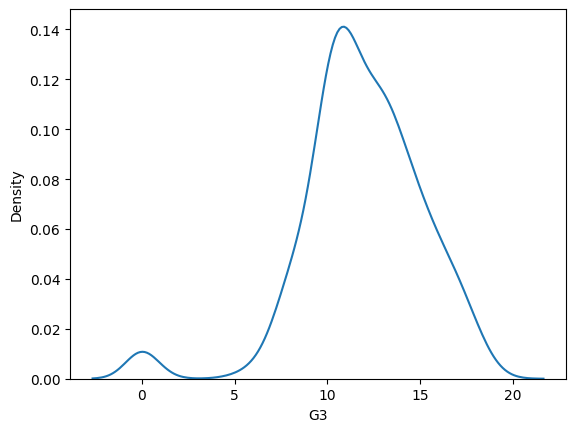

In [13]:
# 5. check the distribution of G3 - the target variable
sns.kdeplot(x='G3',data=df1)

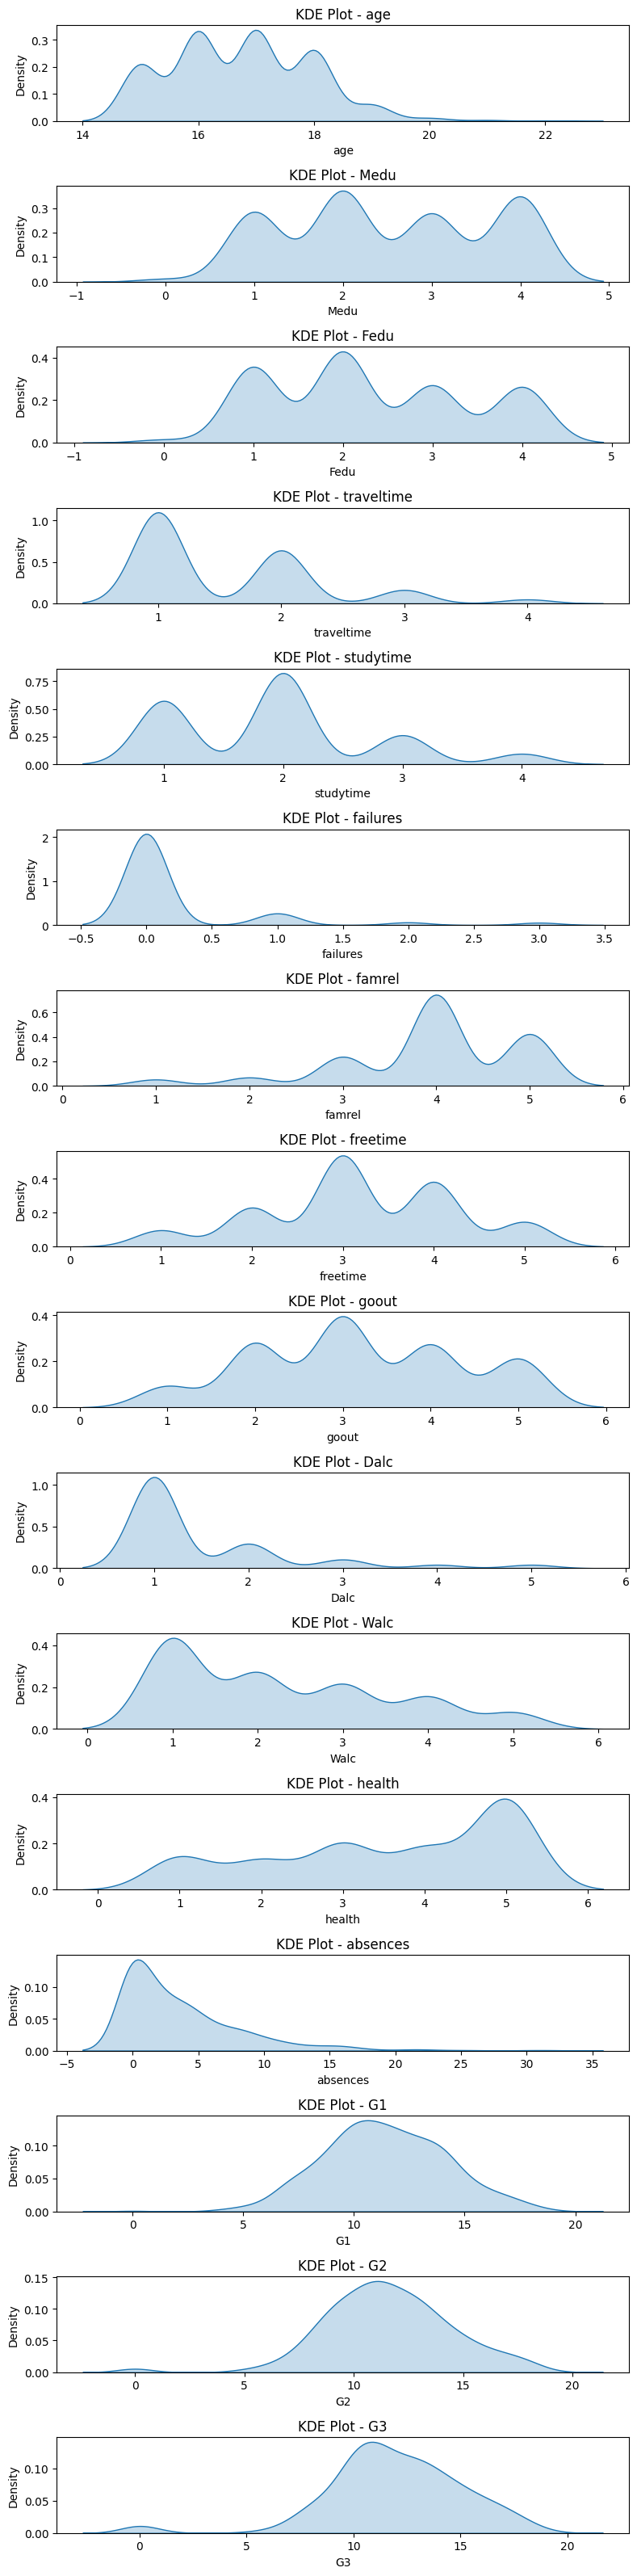

In [14]:
# KDE- plot only for numericals
# countplot- for categorical

# 5.1 Set up subplots to visualise the distribution of all the numeric columns
fig, axes = plt.subplots(nrows=len(c), figsize=(8, 2 * len(c)))

# Iterate over each column and create a KDE plot
for i, column in enumerate(c):
#     print(i,"iiii","col",column)
    sns.kdeplot(data=df1, x=column, ax=axes[i], fill=True)
    axes[i].set_title(f'KDE Plot - {column}')

# Adjust layout
plt.tight_layout()
plt.show()


<Axes: xlabel='G3', ylabel='count'>

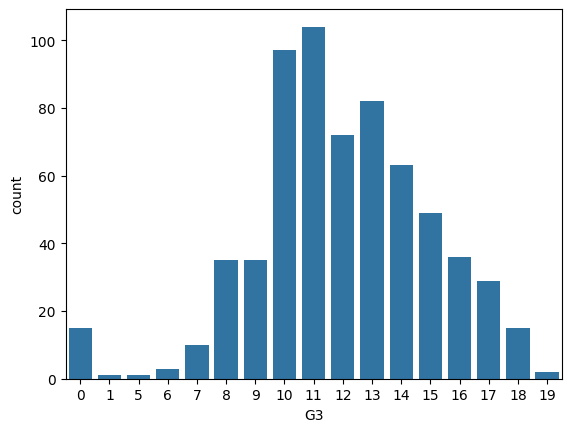

In [15]:
# 6. countplot fot target variable -G3
sns.countplot(x='G3',data=df1)

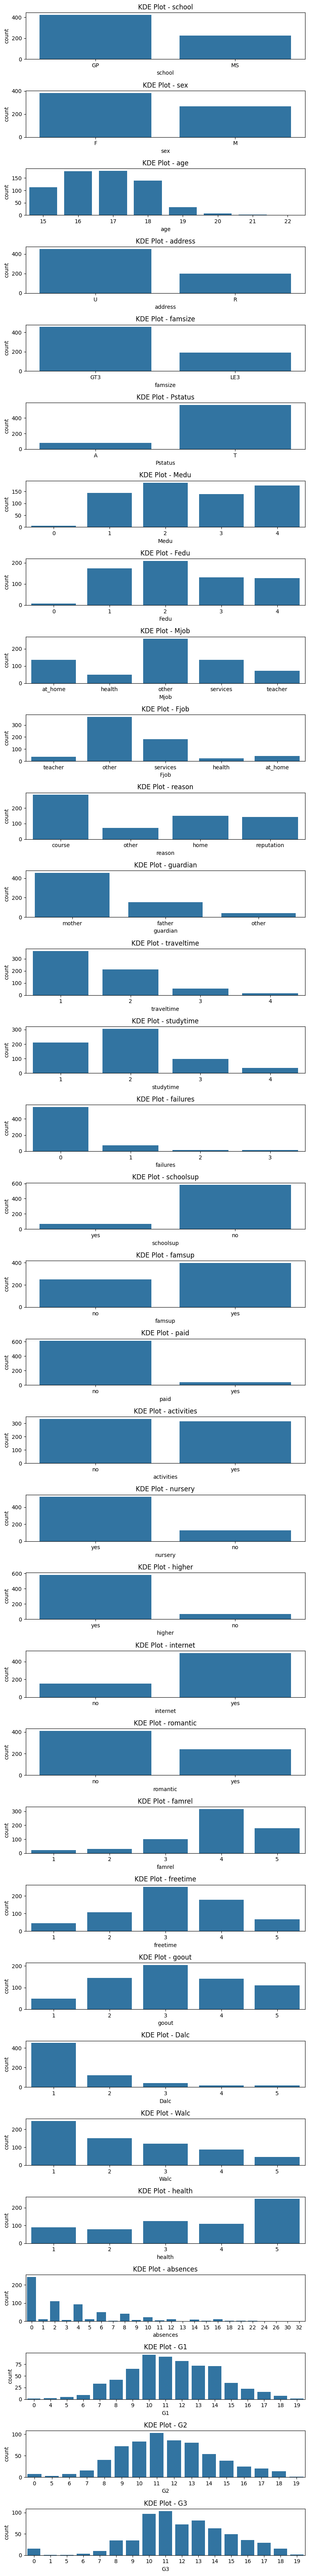

In [16]:

# 6.1 Set up subplots for all columns in the dataset
fig, axes = plt.subplots(nrows=len(df1.columns), figsize=(8, 2 * len(df1.columns)))

# Iterate over each column and create a KDE plot
for i, column in enumerate(df1.columns):
#     print(i,"iiii","col",column)

    sns.countplot(data=df1, x=column, ax=axes[i], fill=True)
    axes[i].set_title(f'KDE Plot - {column}')

# Adjust layout
plt.tight_layout()
plt.show()


In [17]:
# 7. check the value_count of each column grouped by G3 - the target variable

# Use groupby and value_counts to achieve the desired result
for i in df1.columns:
    if i !='G3':
        result = df1.groupby('G3')[i].value_counts().unstack().fillna(0) # unstack and fill the NaN values with 0

        # Display the result
        print(result)
        print("*********************************")


school    GP    MS
G3                
0        1.0  14.0
1        1.0   0.0
5        1.0   0.0
6        2.0   1.0
7        3.0   7.0
8       14.0  21.0
9       10.0  25.0
10      53.0  44.0
11      70.0  34.0
12      55.0  17.0
13      67.0  15.0
14      46.0  17.0
15      41.0   8.0
16      25.0  11.0
17      24.0   5.0
18       9.0   6.0
19       1.0   1.0
*********************************
sex     F     M
G3             
0     7.0   8.0
1     0.0   1.0
5     0.0   1.0
6     0.0   3.0
7     7.0   3.0
8    20.0  15.0
9    16.0  19.0
10   52.0  45.0
11   54.0  50.0
12   44.0  28.0
13   54.0  28.0
14   41.0  22.0
15   32.0  17.0
16   23.0  13.0
17   21.0   8.0
18   11.0   4.0
19    1.0   1.0
*********************************
age    15    16    17    18    19   20   21   22
G3                                              
0     0.0   2.0   2.0   8.0   3.0  0.0  0.0  0.0
1     0.0   1.0   0.0   0.0   0.0  0.0  0.0  0.0
5     0.0   0.0   0.0   0.0   0.0  0.0  0.0  1.0
6     0.0   0.0   1.0 

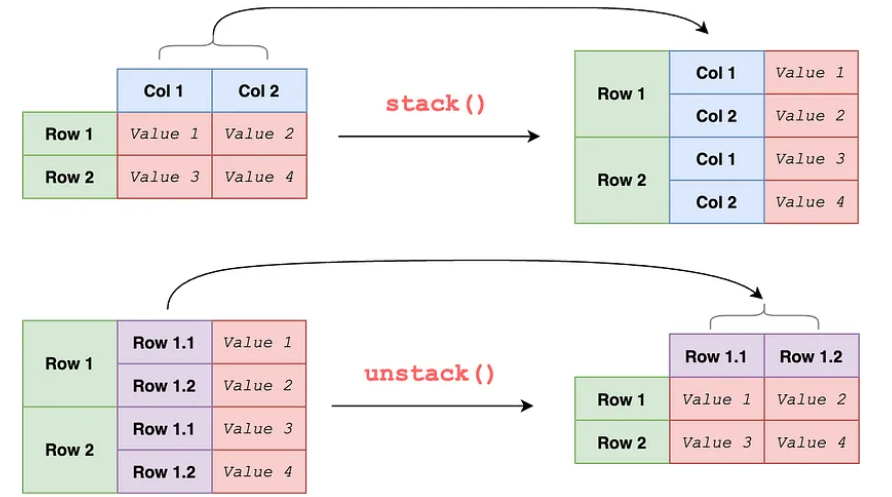

+++++++++++++++ school +++++++++++++++
school    GP    MS
G3                
0        1.0  14.0
1        1.0   0.0
5        1.0   0.0
6        2.0   1.0
7        3.0   7.0
8       14.0  21.0
9       10.0  25.0
10      53.0  44.0
11      70.0  34.0
12      55.0  17.0
13      67.0  15.0
14      46.0  17.0
15      41.0   8.0
16      25.0  11.0
17      24.0   5.0
18       9.0   6.0
19       1.0   1.0


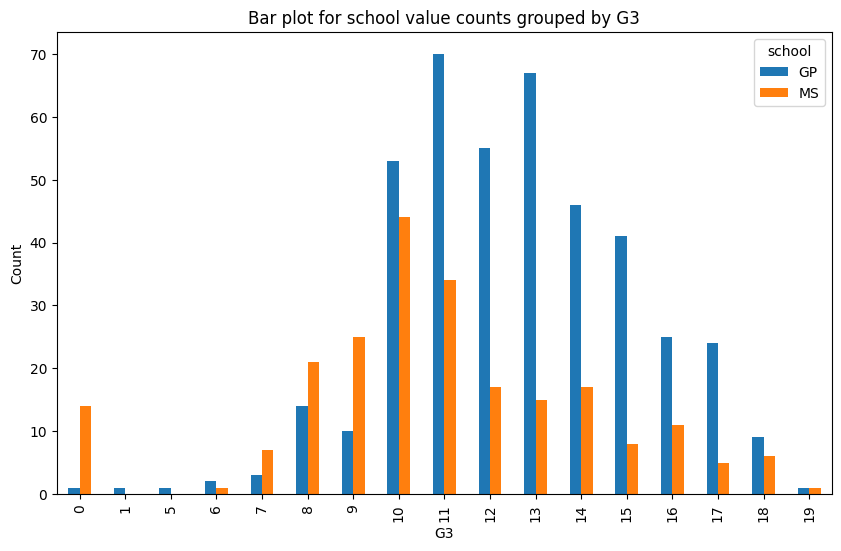

*********************************
+++++++++++++++ sex +++++++++++++++
sex     F     M
G3             
0     7.0   8.0
1     0.0   1.0
5     0.0   1.0
6     0.0   3.0
7     7.0   3.0
8    20.0  15.0
9    16.0  19.0
10   52.0  45.0
11   54.0  50.0
12   44.0  28.0
13   54.0  28.0
14   41.0  22.0
15   32.0  17.0
16   23.0  13.0
17   21.0   8.0
18   11.0   4.0
19    1.0   1.0


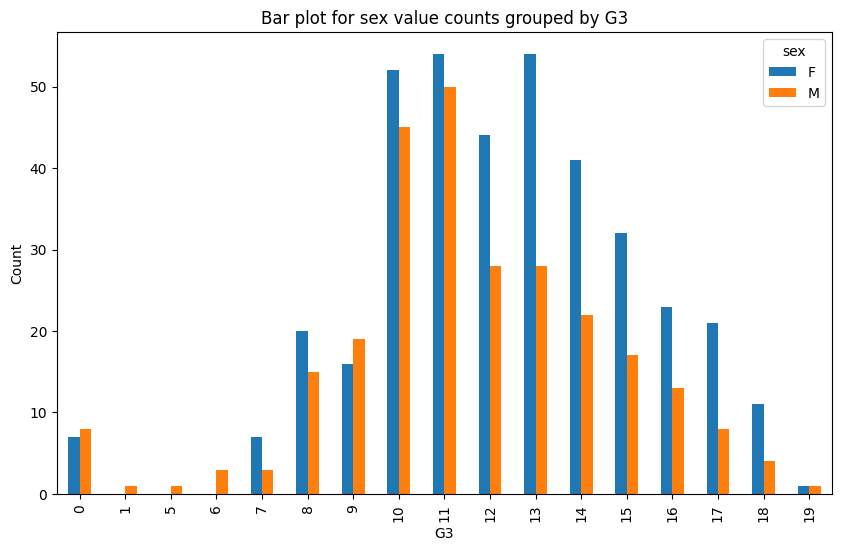

*********************************
+++++++++++++++ age +++++++++++++++
age    15    16    17    18    19   20   21   22
G3                                              
0     0.0   2.0   2.0   8.0   3.0  0.0  0.0  0.0
1     0.0   1.0   0.0   0.0   0.0  0.0  0.0  0.0
5     0.0   0.0   0.0   0.0   0.0  0.0  0.0  1.0
6     0.0   0.0   1.0   2.0   0.0  0.0  0.0  0.0
7     0.0   2.0   3.0   4.0   1.0  0.0  0.0  0.0
8     3.0  14.0   9.0   9.0   0.0  0.0  0.0  0.0
9     9.0   3.0  13.0   4.0   6.0  0.0  0.0  0.0
10   12.0  22.0  30.0  22.0   7.0  3.0  1.0  0.0
11   23.0  36.0  20.0  15.0  10.0  0.0  0.0  0.0
12   21.0  19.0  18.0  10.0   2.0  1.0  1.0  0.0
13   15.0  30.0  22.0  13.0   2.0  0.0  0.0  0.0
14   14.0  17.0  15.0  16.0   1.0  0.0  0.0  0.0
15    8.0  10.0  16.0  13.0   0.0  2.0  0.0  0.0
16    5.0  13.0  11.0   7.0   0.0  0.0  0.0  0.0
17    1.0   5.0  11.0  12.0   0.0  0.0  0.0  0.0
18    1.0   3.0   7.0   4.0   0.0  0.0  0.0  0.0
19    0.0   0.0   1.0   1.0   0.0  0.0  0.0  0.0

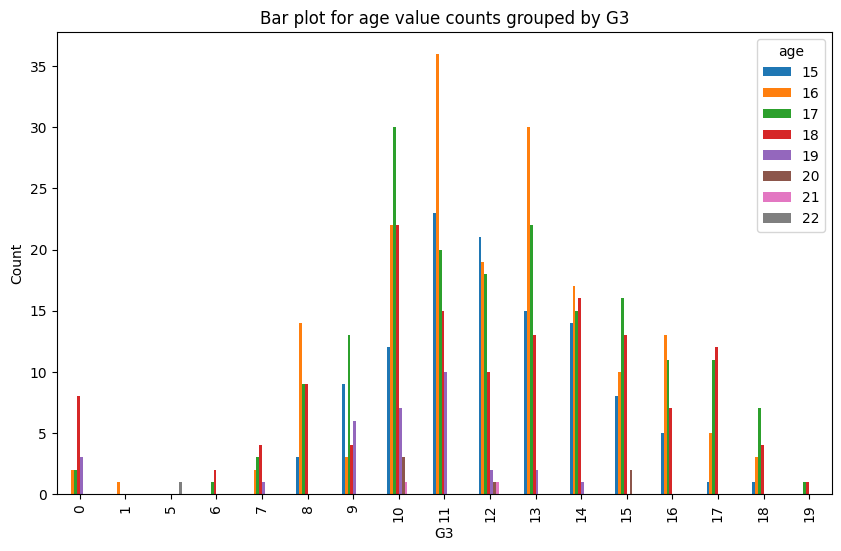

*********************************
+++++++++++++++ address +++++++++++++++
address     R     U
G3                 
0        10.0   5.0
1         0.0   1.0
5         0.0   1.0
6         0.0   3.0
7         2.0   8.0
8        15.0  20.0
9        17.0  18.0
10       36.0  61.0
11       37.0  67.0
12       21.0  51.0
13       15.0  67.0
14       13.0  50.0
15       13.0  36.0
16        6.0  30.0
17        7.0  22.0
18        4.0  11.0
19        1.0   1.0


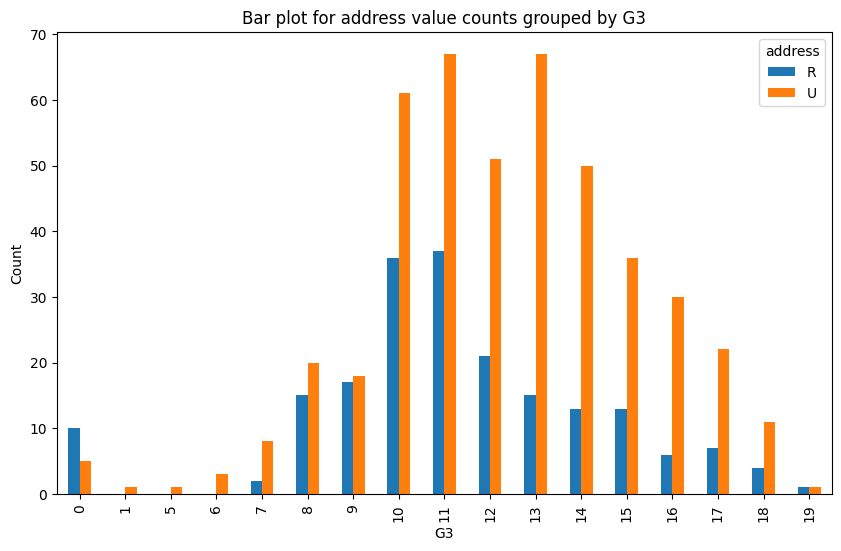

*********************************
+++++++++++++++ famsize +++++++++++++++
famsize   GT3   LE3
G3                 
0        13.0   2.0
1         1.0   0.0
5         1.0   0.0
6         2.0   1.0
7         9.0   1.0
8        25.0  10.0
9        25.0  10.0
10       64.0  33.0
11       72.0  32.0
12       46.0  26.0
13       65.0  17.0
14       46.0  17.0
15       32.0  17.0
16       25.0  11.0
17       20.0   9.0
18       10.0   5.0
19        1.0   1.0


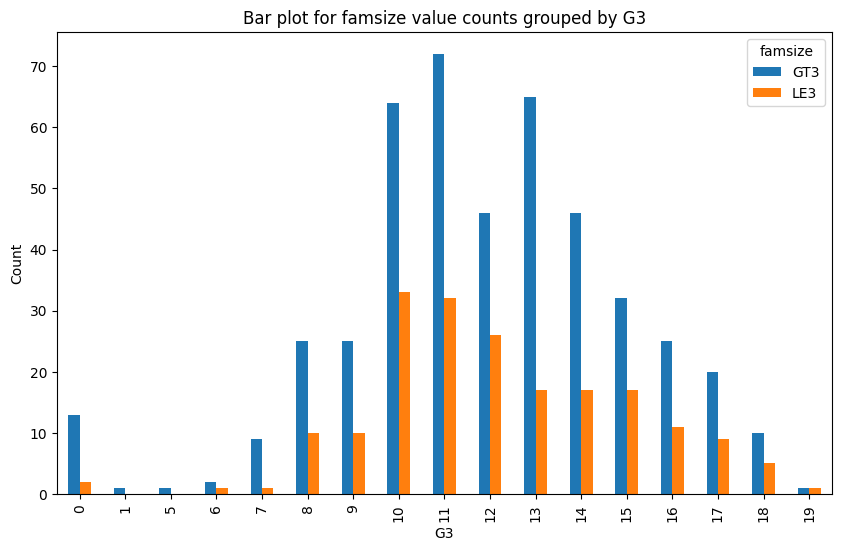

*********************************
+++++++++++++++ Pstatus +++++++++++++++
Pstatus     A     T
G3                 
0         2.0  13.0
1         0.0   1.0
5         0.0   1.0
6         0.0   3.0
7         2.0   8.0
8         5.0  30.0
9         3.0  32.0
10       12.0  85.0
11       13.0  91.0
12        7.0  65.0
13       11.0  71.0
14        8.0  55.0
15        8.0  41.0
16        4.0  32.0
17        4.0  25.0
18        1.0  14.0
19        0.0   2.0


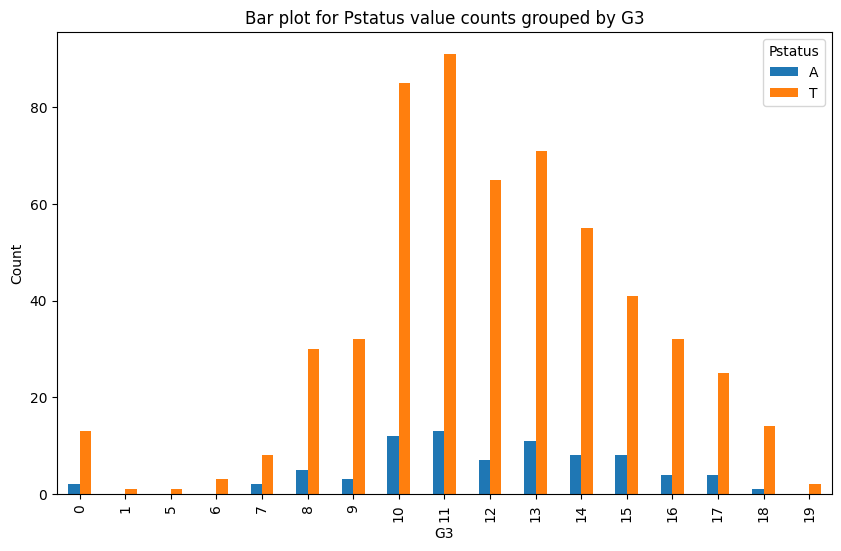

*********************************
+++++++++++++++ Medu +++++++++++++++
Medu    0     1     2     3     4
G3                               
0     0.0   5.0   5.0   1.0   4.0
1     0.0   0.0   0.0   1.0   0.0
5     0.0   0.0   0.0   1.0   0.0
6     0.0   0.0   2.0   0.0   1.0
7     0.0   5.0   0.0   5.0   0.0
8     0.0  10.0  10.0   9.0   6.0
9     0.0  17.0  10.0   5.0   3.0
10    1.0  31.0  32.0  23.0  10.0
11    3.0  26.0  30.0  22.0  23.0
12    1.0  11.0  25.0  14.0  21.0
13    0.0  13.0  27.0  16.0  26.0
14    0.0  12.0  15.0  12.0  24.0
15    1.0   7.0  11.0  12.0  18.0
16    0.0   1.0  13.0   7.0  15.0
17    0.0   0.0   5.0   8.0  16.0
18    0.0   5.0   1.0   2.0   7.0
19    0.0   0.0   0.0   1.0   1.0


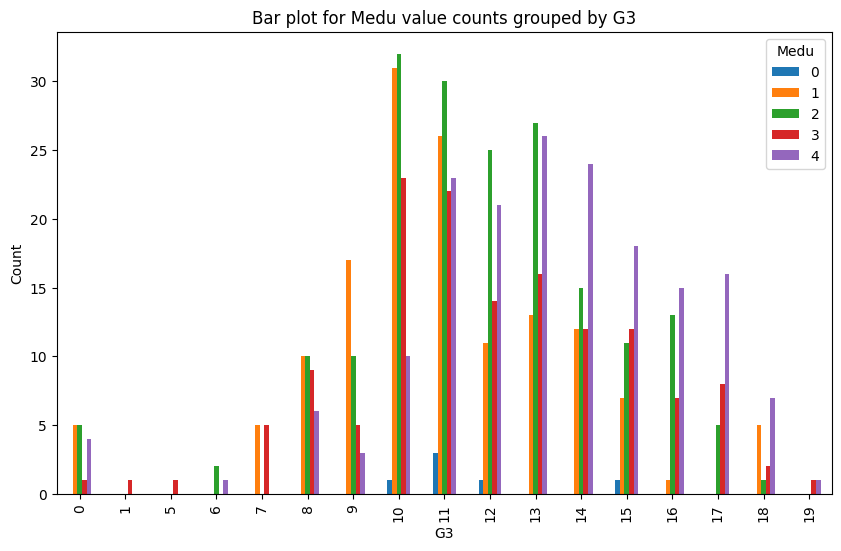

*********************************
+++++++++++++++ Fedu +++++++++++++++
Fedu    0     1     2     3     4
G3                               
0     0.0   7.0   7.0   0.0   1.0
1     0.0   0.0   0.0   1.0   0.0
5     0.0   1.0   0.0   0.0   0.0
6     0.0   2.0   0.0   0.0   1.0
7     0.0   4.0   5.0   1.0   0.0
8     0.0  11.0  11.0   3.0  10.0
9     0.0  20.0   8.0   5.0   2.0
10    2.0  34.0  36.0  18.0   7.0
11    2.0  27.0  36.0  24.0  15.0
12    1.0  16.0  21.0  15.0  19.0
13    1.0  13.0  26.0  23.0  19.0
14    0.0  16.0  17.0  15.0  15.0
15    0.0  10.0  15.0  13.0  11.0
16    0.0   8.0   9.0   5.0  14.0
17    0.0   1.0   9.0   7.0  12.0
18    1.0   3.0   9.0   1.0   1.0
19    0.0   1.0   0.0   0.0   1.0


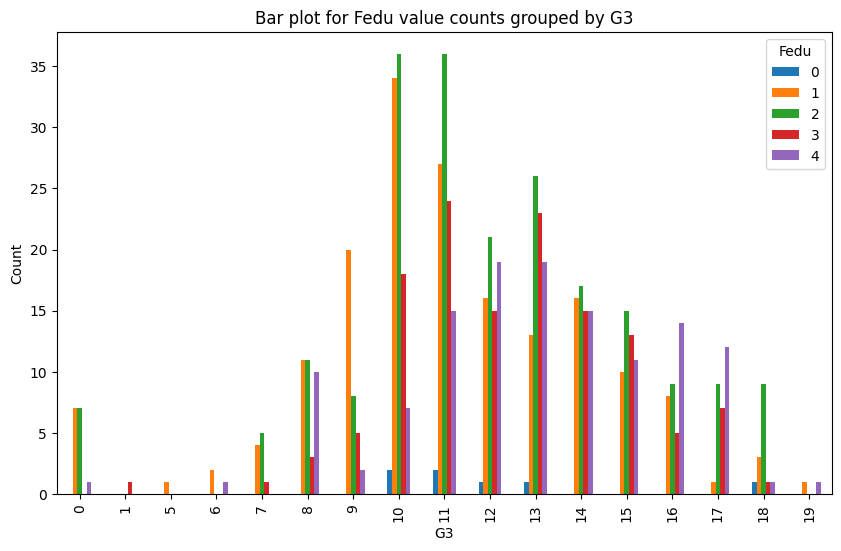

*********************************
+++++++++++++++ Mjob +++++++++++++++
Mjob  at_home  health  other  services  teacher
G3                                             
0         4.0     0.0    8.0       1.0      2.0
1         0.0     0.0    1.0       0.0      0.0
5         0.0     0.0    0.0       1.0      0.0
6         1.0     0.0    1.0       1.0      0.0
7         2.0     0.0    4.0       4.0      0.0
8         8.0     4.0   15.0       7.0      1.0
9        14.0     2.0   13.0       5.0      1.0
10       28.0     6.0   40.0      19.0      4.0
11       34.0     4.0   37.0      18.0     11.0
12        8.0     4.0   31.0      19.0     10.0
13       11.0     5.0   40.0      17.0      9.0
14        9.0     6.0   23.0      13.0     12.0
15        7.0     6.0   17.0      14.0      5.0
16        1.0     4.0   17.0       8.0      6.0
17        3.0     4.0    7.0       8.0      7.0
18        5.0     3.0    4.0       0.0      3.0
19        0.0     0.0    0.0       1.0      1.0


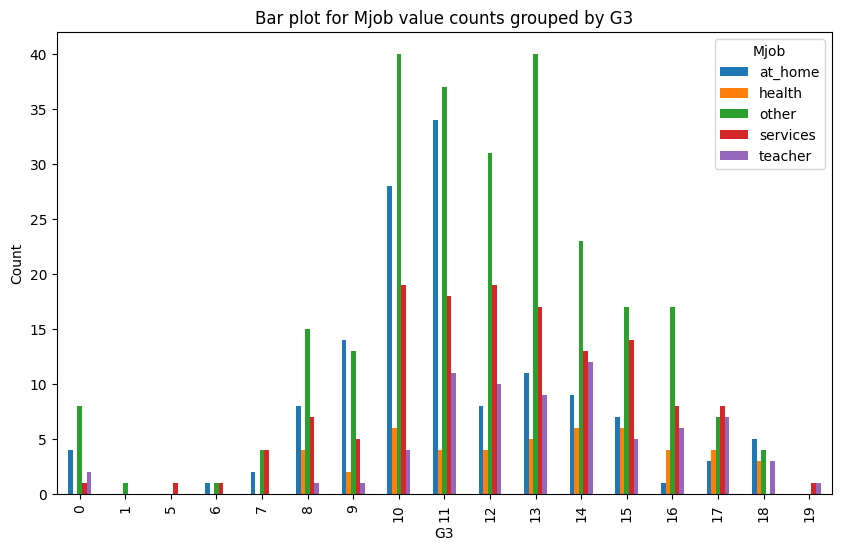

*********************************
+++++++++++++++ Fjob +++++++++++++++
Fjob  at_home  health  other  services  teacher
G3                                             
0         1.0     0.0    8.0       5.0      1.0
1         0.0     0.0    0.0       1.0      0.0
5         0.0     0.0    0.0       1.0      0.0
6         0.0     1.0    1.0       1.0      0.0
7         2.0     0.0    7.0       1.0      0.0
8         3.0     1.0   14.0      16.0      1.0
9         1.0     1.0   24.0       8.0      1.0
10       10.0     4.0   52.0      31.0      0.0
11        7.0     1.0   67.0      25.0      4.0
12        2.0     4.0   42.0      21.0      3.0
13        4.0     3.0   48.0      21.0      6.0
14        6.0     2.0   33.0      16.0      6.0
15        4.0     0.0   33.0       9.0      3.0
16        0.0     3.0   17.0      11.0      5.0
17        0.0     2.0   12.0      11.0      4.0
18        2.0     1.0    8.0       3.0      1.0
19        0.0     0.0    1.0       0.0      1.0


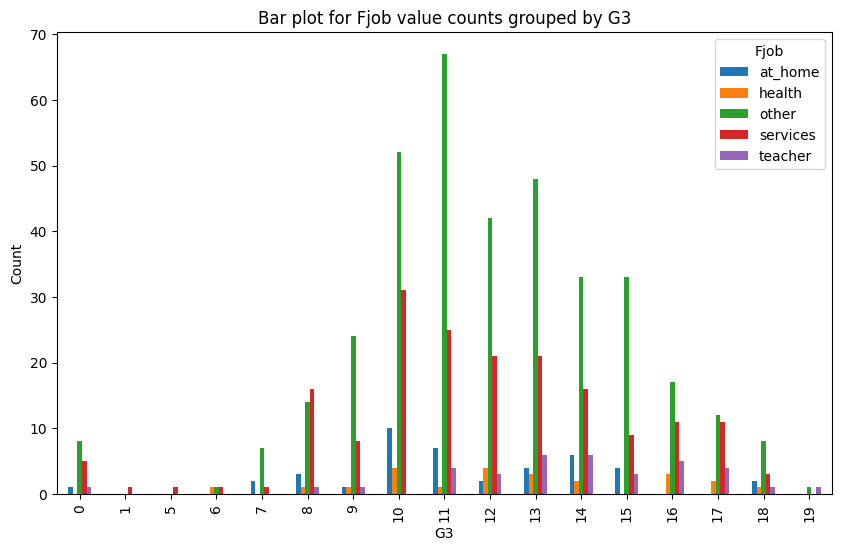

*********************************
+++++++++++++++ reason +++++++++++++++
reason  course  home  other  reputation
G3                                     
0          5.0   3.0    5.0         2.0
1          1.0   0.0    0.0         0.0
5          0.0   0.0    1.0         0.0
6          0.0   2.0    1.0         0.0
7          8.0   0.0    2.0         0.0
8         21.0   3.0    5.0         6.0
9         20.0   9.0    4.0         2.0
10        54.0  16.0   10.0        17.0
11        43.0  26.0   15.0        20.0
12        29.0  17.0    9.0        17.0
13        32.0  31.0    3.0        16.0
14        23.0  13.0    8.0        19.0
15        20.0  12.0    2.0        15.0
16        12.0  10.0    5.0         9.0
17        11.0   4.0    1.0        13.0
18         6.0   2.0    1.0         6.0
19         0.0   1.0    0.0         1.0


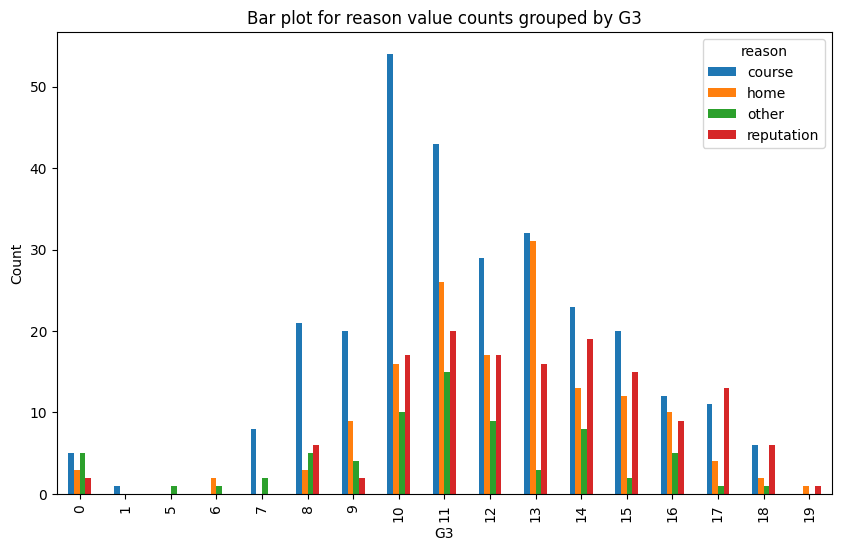

*********************************
+++++++++++++++ guardian +++++++++++++++
guardian  father  mother  other
G3                             
0            3.0    11.0    1.0
1            1.0     0.0    0.0
5            0.0     1.0    0.0
6            0.0     3.0    0.0
7            2.0     8.0    0.0
8            7.0    25.0    3.0
9            3.0    27.0    5.0
10          19.0    70.0    8.0
11          27.0    68.0    9.0
12          23.0    43.0    6.0
13          18.0    61.0    3.0
14          18.0    43.0    2.0
15          10.0    35.0    4.0
16          11.0    25.0    0.0
17           5.0    24.0    0.0
18           5.0    10.0    0.0
19           1.0     1.0    0.0


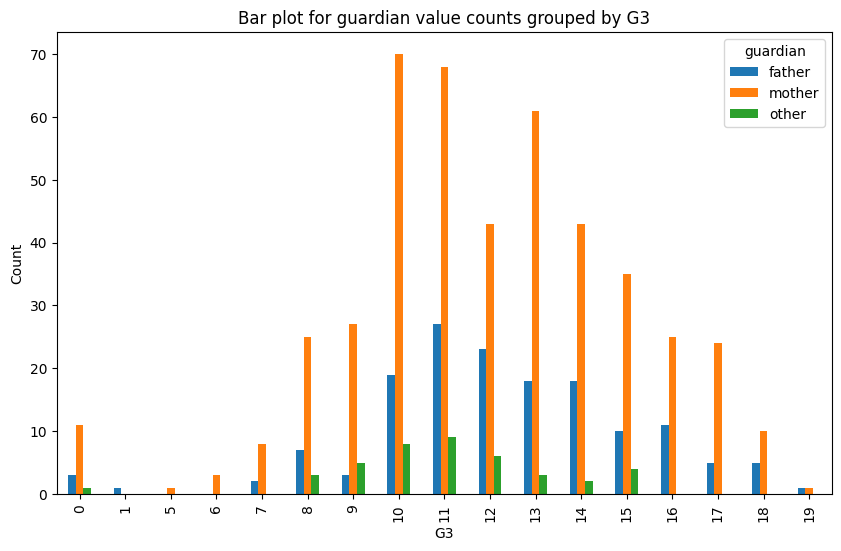

*********************************
+++++++++++++++ traveltime +++++++++++++++
traveltime     1     2     3    4
G3                               
0            5.0   8.0   2.0  0.0
1            1.0   0.0   0.0  0.0
5            1.0   0.0   0.0  0.0
6            3.0   0.0   0.0  0.0
7            6.0   3.0   1.0  0.0
8           21.0   9.0   3.0  2.0
9           14.0  14.0   6.0  1.0
10          42.0  42.0   9.0  4.0
11          50.0  36.0  13.0  5.0
12          48.0  22.0   1.0  1.0
13          50.0  24.0   6.0  2.0
14          43.0  14.0   6.0  0.0
15          27.0  19.0   3.0  0.0
16          23.0   9.0   3.0  1.0
17          24.0   5.0   0.0  0.0
18           7.0   7.0   1.0  0.0
19           1.0   1.0   0.0  0.0


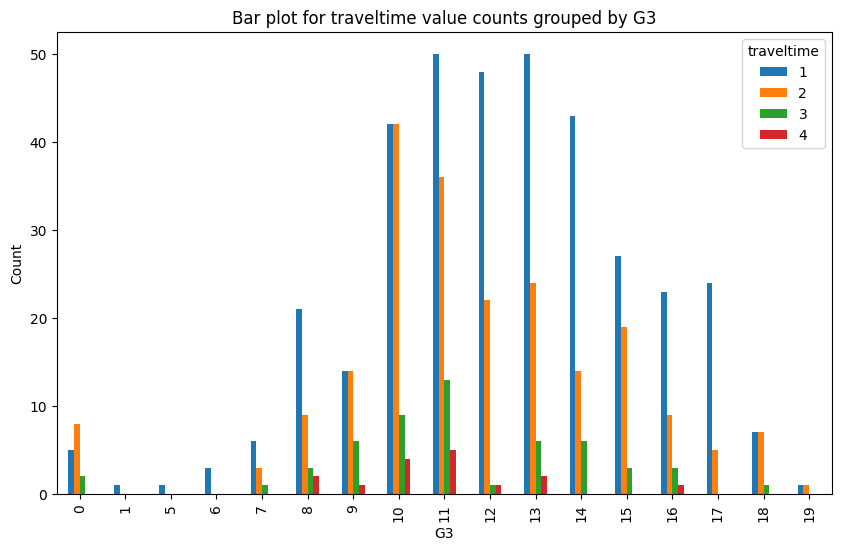

*********************************
+++++++++++++++ studytime +++++++++++++++
studytime     1     2     3    4
G3                              
0           8.0   7.0   0.0  0.0
1           0.0   1.0   0.0  0.0
5           1.0   0.0   0.0  0.0
6           2.0   0.0   0.0  1.0
7           7.0   3.0   0.0  0.0
8          12.0  18.0   5.0  0.0
9          20.0  12.0   2.0  1.0
10         41.0  43.0   8.0  5.0
11         42.0  48.0   9.0  5.0
12         22.0  34.0  11.0  5.0
13         20.0  40.0  17.0  5.0
14         15.0  32.0  13.0  3.0
15          9.0  23.0  15.0  2.0
16          6.0  23.0   6.0  1.0
17          6.0  12.0   8.0  3.0
18          1.0   8.0   3.0  3.0
19          0.0   1.0   0.0  1.0


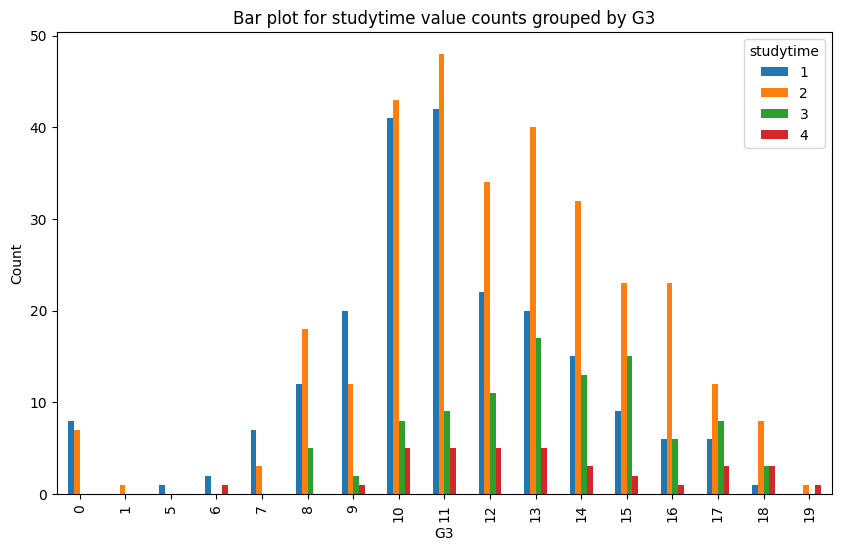

*********************************
+++++++++++++++ failures +++++++++++++++
failures     0     1    2    3
G3                            
0          6.0   7.0  1.0  1.0
1          0.0   1.0  0.0  0.0
5          0.0   0.0  0.0  1.0
6          2.0   0.0  1.0  0.0
7          3.0   4.0  2.0  1.0
8         17.0  11.0  3.0  4.0
9         23.0   9.0  1.0  2.0
10        65.0  23.0  5.0  4.0
11        92.0  10.0  1.0  1.0
12        70.0   1.0  1.0  0.0
13        79.0   3.0  0.0  0.0
14        63.0   0.0  0.0  0.0
15        48.0   0.0  1.0  0.0
16        35.0   1.0  0.0  0.0
17        29.0   0.0  0.0  0.0
18        15.0   0.0  0.0  0.0
19         2.0   0.0  0.0  0.0


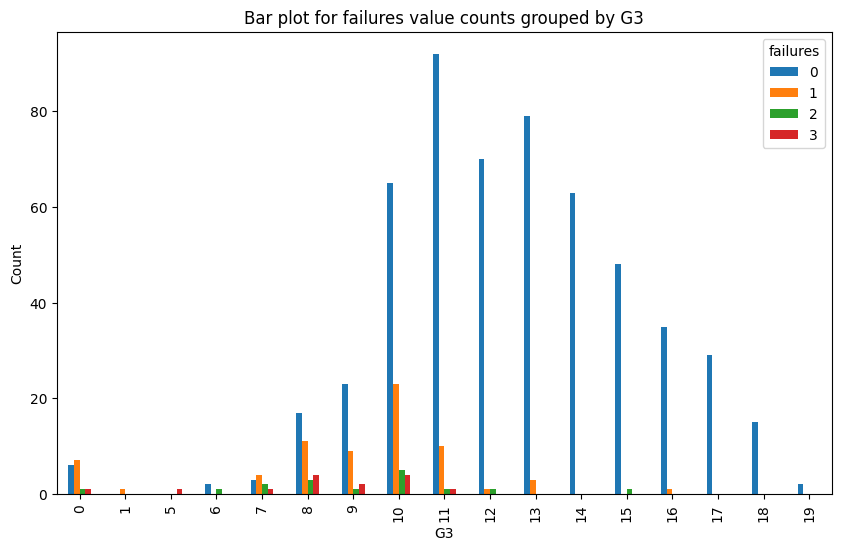

*********************************
+++++++++++++++ schoolsup +++++++++++++++
schoolsup    no   yes
G3                   
0          14.0   1.0
1           1.0   0.0
5           1.0   0.0
6           3.0   0.0
7          10.0   0.0
8          31.0   4.0
9          32.0   3.0
10         82.0  15.0
11         90.0  14.0
12         61.0  11.0
13         68.0  14.0
14         59.0   4.0
15         49.0   0.0
16         35.0   1.0
17         29.0   0.0
18         14.0   1.0
19          2.0   0.0


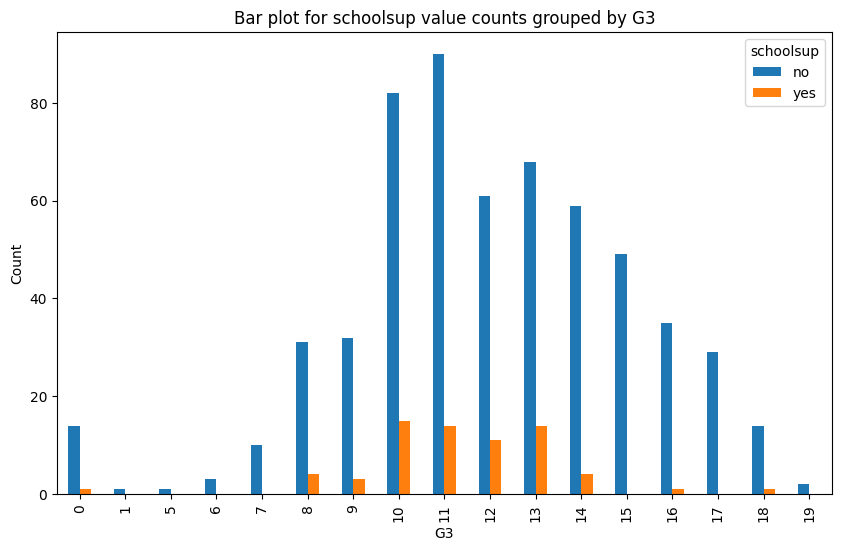

*********************************
+++++++++++++++ famsup +++++++++++++++
famsup    no   yes
G3                
0       11.0   4.0
1        0.0   1.0
5        1.0   0.0
6        1.0   2.0
7        4.0   6.0
8        8.0  27.0
9       18.0  17.0
10      39.0  58.0
11      38.0  66.0
12      28.0  44.0
13      26.0  56.0
14      27.0  36.0
15      21.0  28.0
16      12.0  24.0
17      11.0  18.0
18       5.0  10.0
19       1.0   1.0


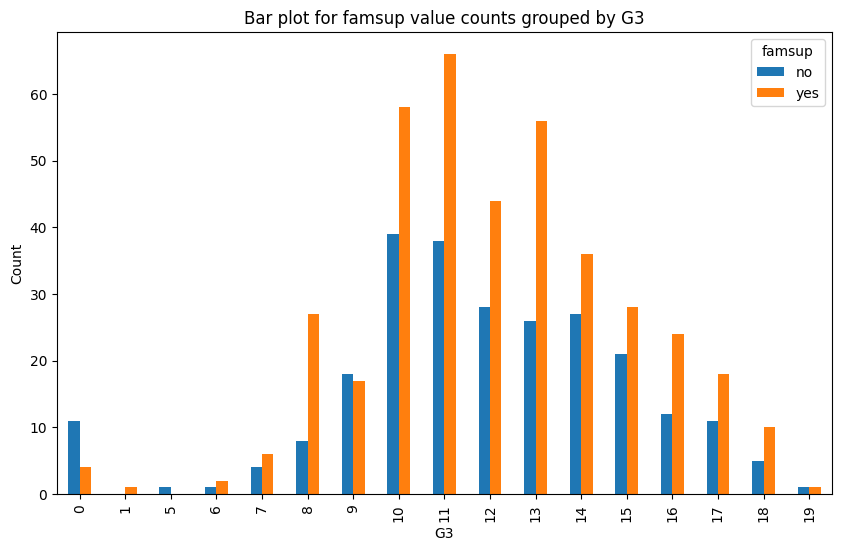

*********************************
+++++++++++++++ paid +++++++++++++++
paid    no  yes
G3             
0     14.0  1.0
1      1.0  0.0
5      1.0  0.0
6      3.0  0.0
7      9.0  1.0
8     32.0  3.0
9     31.0  4.0
10    94.0  3.0
11    97.0  7.0
12    64.0  8.0
13    75.0  7.0
14    62.0  1.0
15    47.0  2.0
16    34.0  2.0
17    29.0  0.0
18    15.0  0.0
19     2.0  0.0


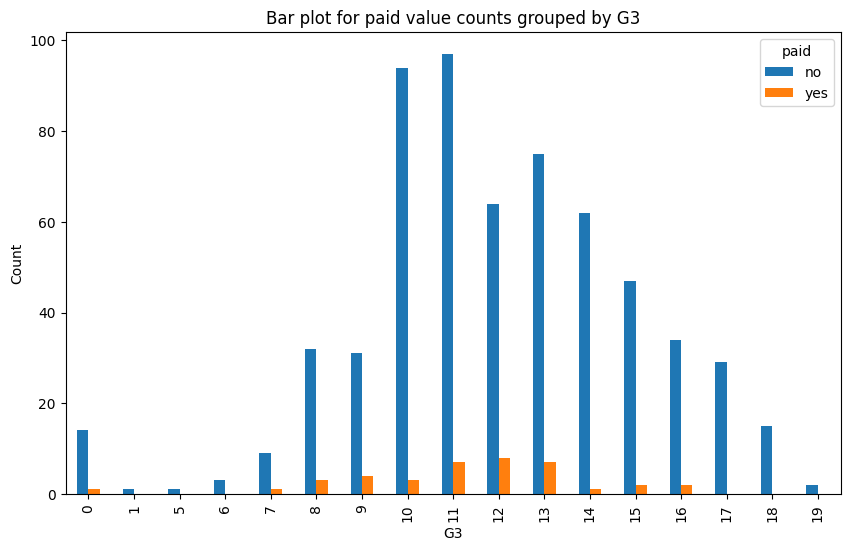

*********************************
+++++++++++++++ activities +++++++++++++++
activities    no   yes
G3                    
0            7.0   8.0
1            1.0   0.0
5            1.0   0.0
6            2.0   1.0
7            6.0   4.0
8           19.0  16.0
9           21.0  14.0
10          53.0  44.0
11          65.0  39.0
12          27.0  45.0
13          43.0  39.0
14          25.0  38.0
15          25.0  24.0
16          15.0  21.0
17          13.0  16.0
18          10.0   5.0
19           1.0   1.0


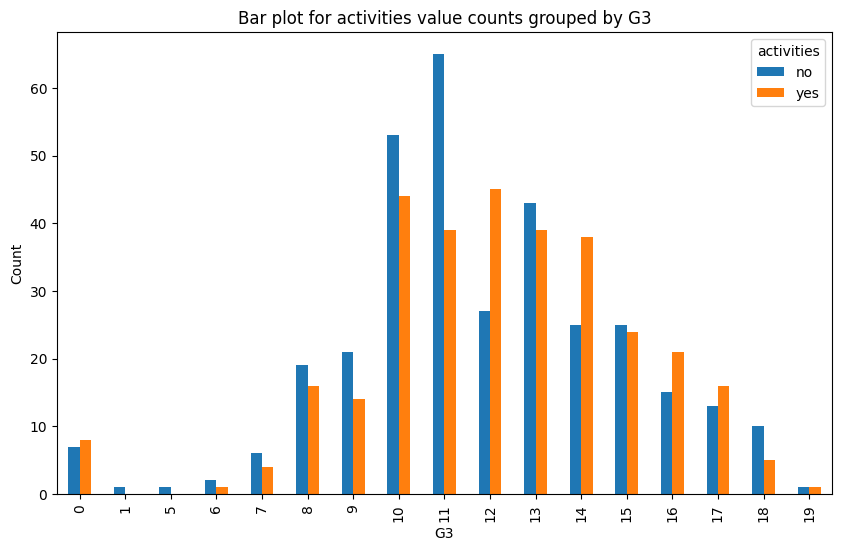

*********************************
+++++++++++++++ nursery +++++++++++++++
nursery    no   yes
G3                 
0         2.0  13.0
1         0.0   1.0
5         1.0   0.0
6         1.0   2.0
7         1.0   9.0
8         5.0  30.0
9         9.0  26.0
10       22.0  75.0
11       27.0  77.0
12       15.0  57.0
13       16.0  66.0
14        8.0  55.0
15        7.0  42.0
16        5.0  31.0
17        4.0  25.0
18        4.0  11.0
19        1.0   1.0


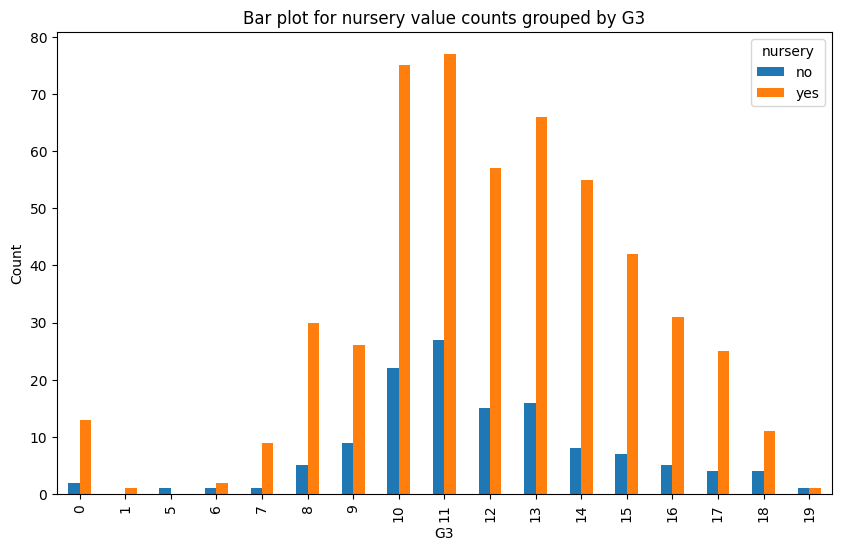

*********************************
+++++++++++++++ higher +++++++++++++++
higher    no   yes
G3                
0        5.0  10.0
1        0.0   1.0
5        1.0   0.0
6        2.0   1.0
7        5.0   5.0
8       10.0  25.0
9       10.0  25.0
10      19.0  78.0
11      12.0  92.0
12       3.0  69.0
13       1.0  81.0
14       1.0  62.0
15       0.0  49.0
16       0.0  36.0
17       0.0  29.0
18       0.0  15.0
19       0.0   2.0


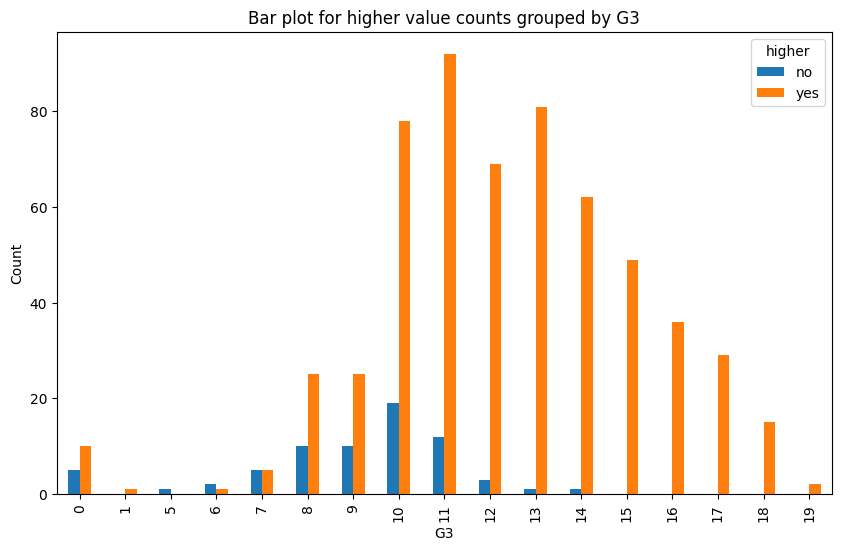

*********************************
+++++++++++++++ internet +++++++++++++++
internet    no   yes
G3                  
0          7.0   8.0
1          0.0   1.0
5          0.0   1.0
6          0.0   3.0
7          3.0   7.0
8         10.0  25.0
9         12.0  23.0
10        29.0  68.0
11        30.0  74.0
12        15.0  57.0
13        17.0  65.0
14         9.0  54.0
15         7.0  42.0
16         5.0  31.0
17         3.0  26.0
18         3.0  12.0
19         1.0   1.0


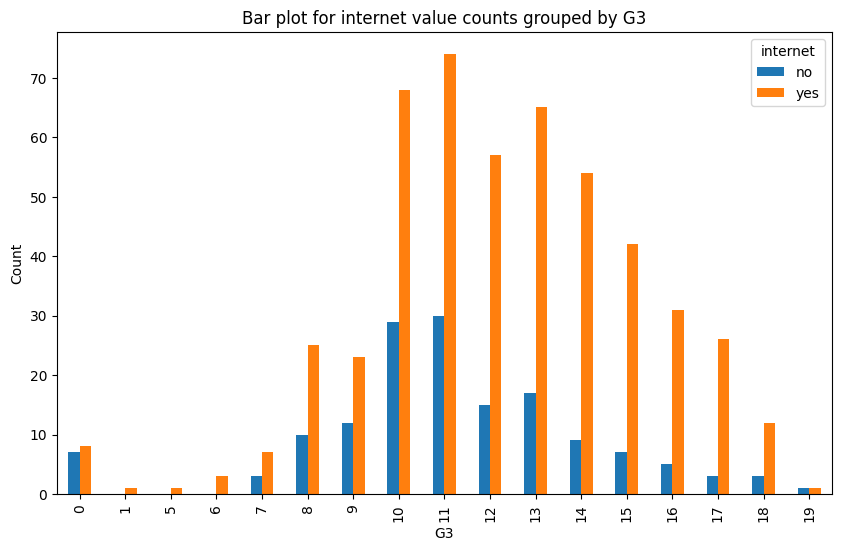

*********************************
+++++++++++++++ romantic +++++++++++++++
romantic    no   yes
G3                  
0          6.0   9.0
1          0.0   1.0
5          0.0   1.0
6          2.0   1.0
7          6.0   4.0
8         20.0  15.0
9         20.0  15.0
10        56.0  41.0
11        73.0  31.0
12        45.0  27.0
13        56.0  26.0
14        44.0  19.0
15        28.0  21.0
16        21.0  15.0
17        20.0   9.0
18        11.0   4.0
19         2.0   0.0


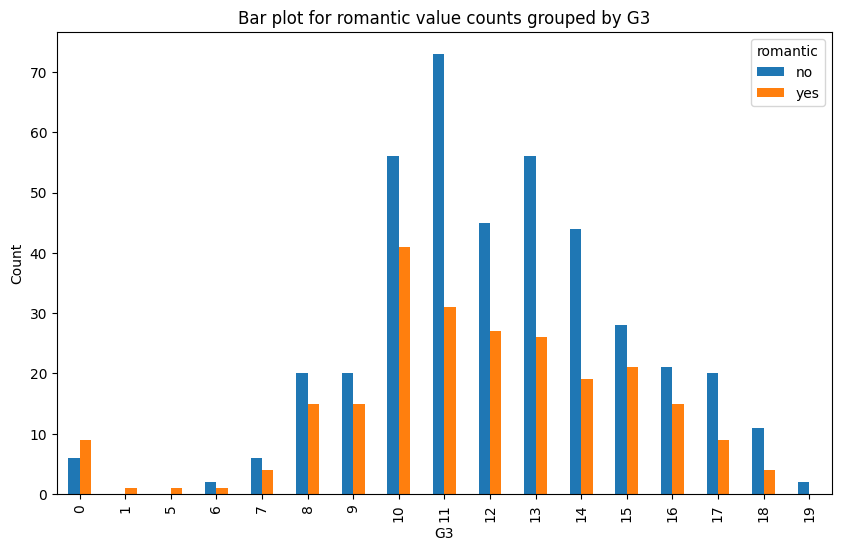

*********************************
+++++++++++++++ famrel +++++++++++++++
famrel    1    2     3     4     5
G3                                
0       1.0  2.0   2.0   3.0   7.0
1       0.0  0.0   0.0   1.0   0.0
5       0.0  0.0   0.0   0.0   1.0
6       0.0  0.0   1.0   0.0   2.0
7       1.0  1.0   2.0   3.0   3.0
8       2.0  2.0   5.0  15.0  11.0
9       5.0  0.0   6.0  12.0  12.0
10      2.0  5.0  17.0  49.0  24.0
11      3.0  7.0  19.0  51.0  24.0
12      3.0  1.0  15.0  36.0  17.0
13      0.0  5.0  10.0  42.0  25.0
14      1.0  3.0  11.0  27.0  21.0
15      2.0  2.0   5.0  27.0  13.0
16      1.0  1.0   3.0  25.0   6.0
17      1.0  0.0   1.0  17.0  10.0
18      0.0  0.0   2.0   9.0   4.0
19      0.0  0.0   2.0   0.0   0.0


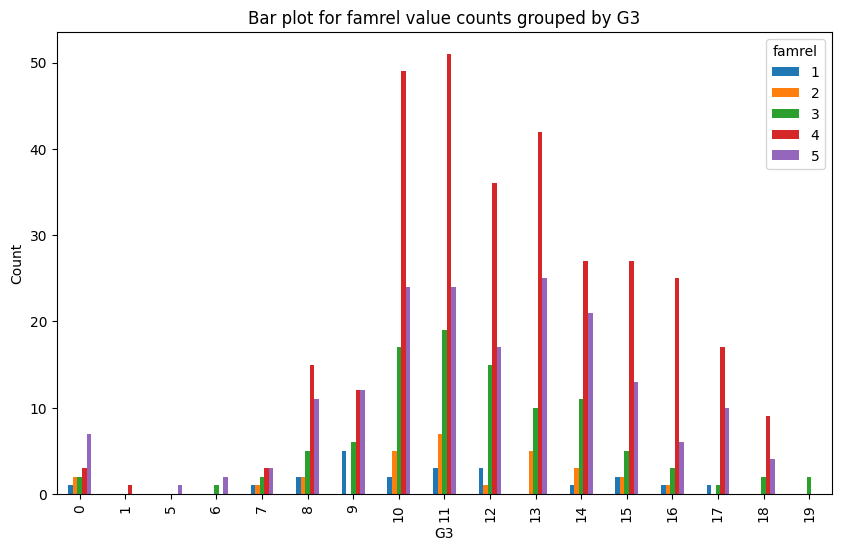

*********************************
+++++++++++++++ freetime +++++++++++++++
freetime     1     2     3     4     5
G3                                    
0          0.0   3.0   5.0   3.0   4.0
1          0.0   0.0   0.0   0.0   1.0
5          0.0   0.0   0.0   1.0   0.0
6          0.0   1.0   0.0   1.0   1.0
7          2.0   0.0   2.0   4.0   2.0
8          1.0   3.0  15.0  12.0   4.0
9          4.0   5.0  11.0   8.0   7.0
10         9.0   8.0  34.0  34.0  12.0
11         6.0  19.0  40.0  27.0  12.0
12         5.0   8.0  37.0  19.0   3.0
13        11.0  15.0  33.0  17.0   6.0
14         2.0  13.0  24.0  19.0   5.0
15         1.0   8.0  20.0  14.0   6.0
16         2.0  12.0  12.0   8.0   2.0
17         1.0   6.0  11.0  10.0   1.0
18         0.0   5.0   7.0   1.0   2.0
19         1.0   1.0   0.0   0.0   0.0


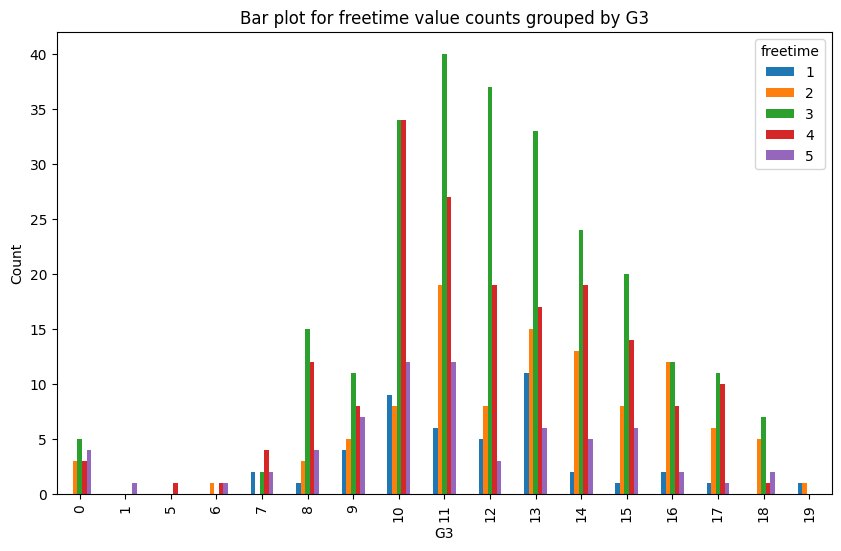

*********************************
+++++++++++++++ goout +++++++++++++++
goout     1     2     3     4     5
G3                                 
0       4.0   2.0   3.0   1.0   5.0
1       0.0   0.0   0.0   0.0   1.0
5       0.0   0.0   0.0   0.0   1.0
6       0.0   0.0   0.0   0.0   3.0
7       1.0   1.0   1.0   3.0   4.0
8       1.0   7.0  13.0  10.0   4.0
9       6.0   6.0   6.0   7.0  10.0
10      7.0  19.0  32.0  21.0  18.0
11      6.0  18.0  35.0  25.0  20.0
12      4.0  18.0  24.0  19.0   7.0
13      6.0  22.0  27.0  17.0  10.0
14     11.0   9.0  21.0  12.0  10.0
15      2.0  14.0  16.0   9.0   8.0
16      0.0   9.0  16.0   5.0   6.0
17      0.0  11.0   6.0  10.0   2.0
18      0.0   8.0   5.0   1.0   1.0
19      0.0   1.0   0.0   1.0   0.0


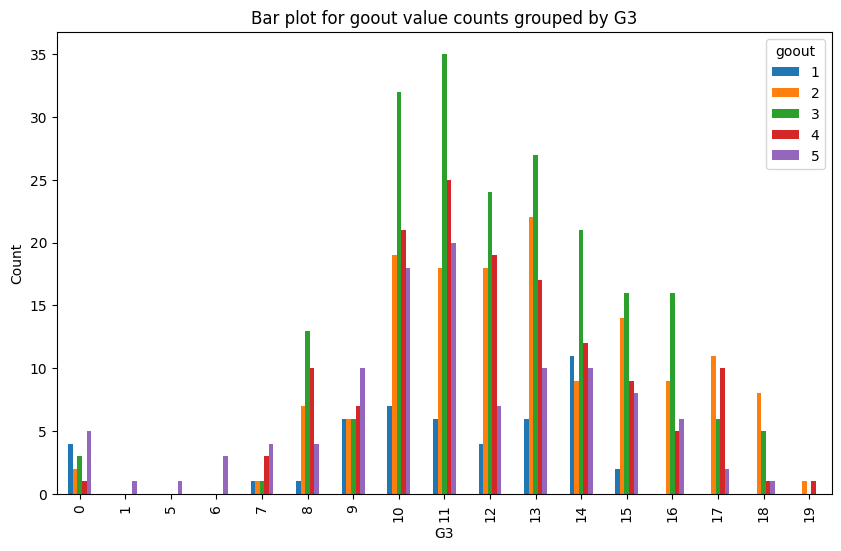

*********************************
+++++++++++++++ Dalc +++++++++++++++
Dalc     1     2     3    4    5
G3                              
0      8.0   4.0   0.0  3.0  0.0
1      0.0   0.0   0.0  1.0  0.0
5      0.0   0.0   0.0  0.0  1.0
6      1.0   1.0   0.0  0.0  1.0
7      5.0   4.0   0.0  0.0  1.0
8     26.0   5.0   3.0  0.0  1.0
9     18.0  10.0   4.0  1.0  2.0
10    59.0  20.0  14.0  1.0  3.0
11    63.0  22.0  10.0  5.0  4.0
12    49.0  15.0   3.0  3.0  2.0
13    67.0  12.0   2.0  1.0  0.0
14    48.0   9.0   4.0  2.0  0.0
15    43.0   6.0   0.0  0.0  0.0
16    27.0   6.0   1.0  0.0  2.0
17    23.0   5.0   1.0  0.0  0.0
18    12.0   2.0   1.0  0.0  0.0
19     2.0   0.0   0.0  0.0  0.0


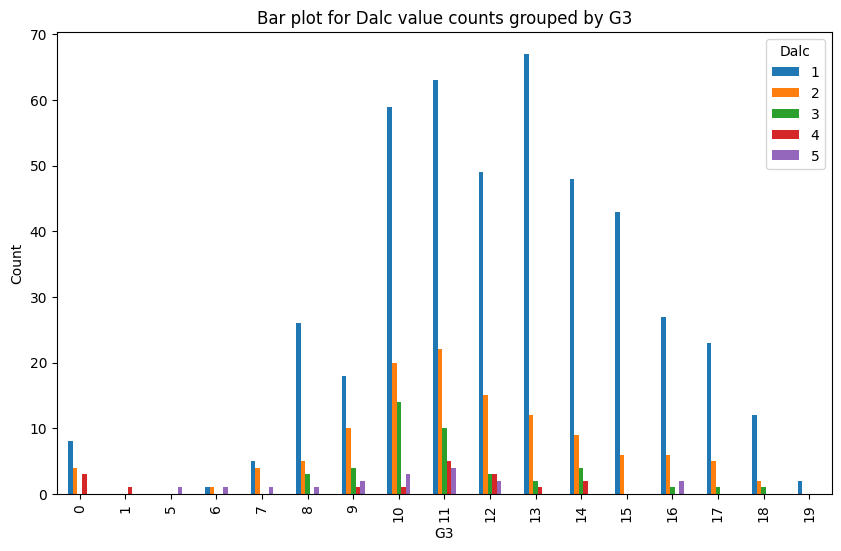

*********************************
+++++++++++++++ Walc +++++++++++++++
Walc     1     2     3     4    5
G3                               
0      4.0   2.0   6.0   1.0  2.0
1      0.0   0.0   0.0   1.0  0.0
5      0.0   0.0   0.0   0.0  1.0
6      0.0   1.0   0.0   0.0  2.0
7      4.0   2.0   0.0   3.0  1.0
8     10.0   9.0   7.0   6.0  3.0
9     10.0   7.0  10.0   5.0  3.0
10    36.0  19.0  14.0  20.0  8.0
11    35.0  24.0  14.0  22.0  9.0
12    25.0  15.0  20.0   5.0  7.0
13    39.0  20.0  13.0   9.0  1.0
14    25.0  19.0  11.0   6.0  2.0
15    21.0   9.0  12.0   5.0  2.0
16    17.0   9.0   5.0   3.0  2.0
17    13.0   7.0   7.0   0.0  2.0
18     7.0   7.0   1.0   0.0  0.0
19     1.0   0.0   0.0   1.0  0.0


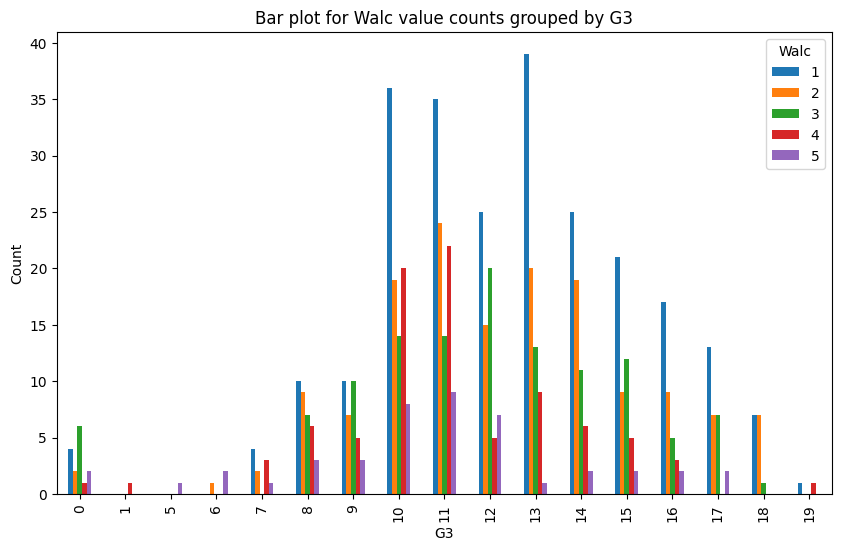

*********************************
+++++++++++++++ health +++++++++++++++
health     1     2     3     4     5
G3                                  
0        1.0   2.0   3.0   2.0   7.0
1        0.0   0.0   0.0   0.0   1.0
5        1.0   0.0   0.0   0.0   0.0
6        0.0   0.0   0.0   0.0   3.0
7        2.0   0.0   2.0   0.0   6.0
8        6.0   6.0   4.0   6.0  13.0
9        7.0   1.0   9.0   4.0  14.0
10       8.0  14.0  18.0  17.0  40.0
11      12.0   9.0  22.0  12.0  49.0
12       2.0  11.0  16.0  12.0  31.0
13      12.0   6.0  23.0  18.0  23.0
14      10.0  10.0   8.0  14.0  21.0
15      14.0   8.0   5.0   8.0  14.0
16       7.0   5.0   4.0   8.0  12.0
17       5.0   4.0   4.0   5.0  11.0
18       3.0   1.0   5.0   2.0   4.0
19       0.0   1.0   1.0   0.0   0.0


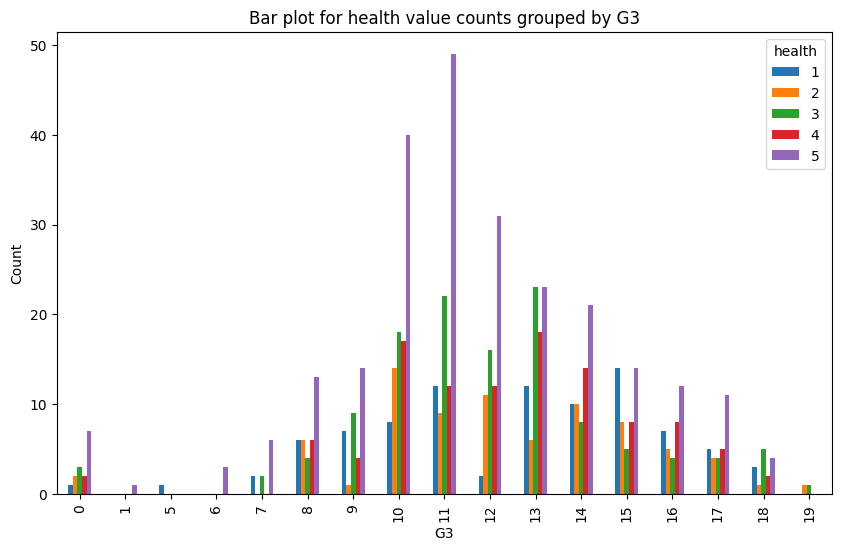

*********************************
+++++++++++++++ absences +++++++++++++++
absences    0    1     2    3     4    5     6    7    8    9   ...   14   15  \
G3                                                              ...             
0         15.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
1          1.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
5          0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
6          0.0  0.0   1.0  0.0   1.0  0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0   
7          2.0  0.0   2.0  1.0   0.0  0.0   0.0  0.0  2.0  1.0  ...  1.0  0.0   
8          6.0  0.0   6.0  2.0   4.0  1.0   3.0  1.0  2.0  2.0  ...  2.0  0.0   
9         10.0  0.0   7.0  0.0   6.0  1.0   3.0  0.0  5.0  0.0  ...  0.0  0.0   
10        30.0  2.0  13.0  2.0  15.0  2.0   7.0  0.0  6.0  3.0  ...  1.0  1.0   
11        29.0  3.0  16.0  0.0  22.0  3.0   9.0  0.0  8.0  0.0  ...  3.0  0.0   
12        26.0  1.0  18.0  0.0   8

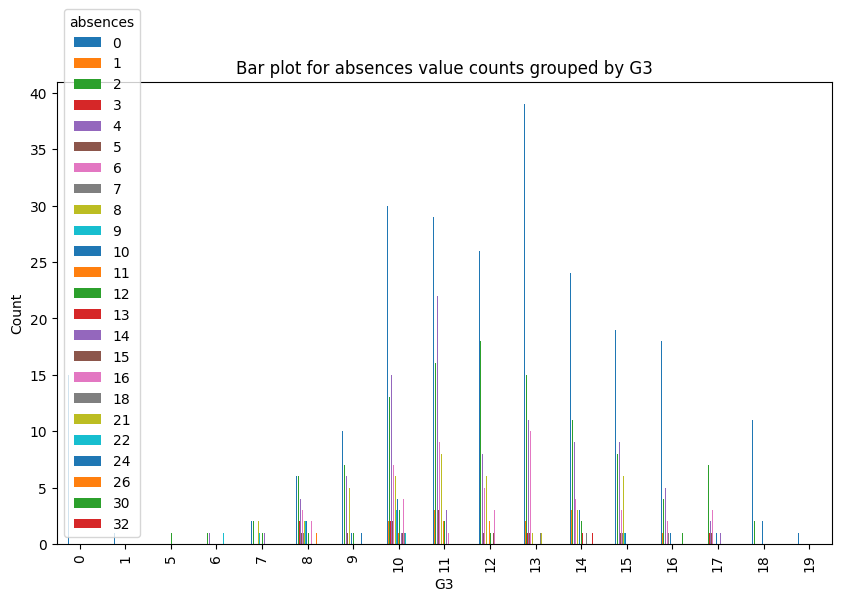

*********************************
+++++++++++++++ G1 +++++++++++++++
G1   0    4    5    6     7     8     9     10    11    12    13    14    15  \
G3                                                                             
0   0.0  1.0  3.0  0.0   5.0   4.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   
1   0.0  0.0  0.0  0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
5   0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6   0.0  0.0  1.0  0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
7   0.0  0.0  1.0  3.0   4.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
8   0.0  1.0  0.0  3.0  10.0  10.0   8.0   3.0   0.0   0.0   0.0   0.0   0.0   
9   0.0  0.0  0.0  2.0   6.0  12.0   8.0   6.0   1.0   0.0   0.0   0.0   0.0   
10  0.0  0.0  0.0  0.0   5.0  12.0  27.0  32.0  19.0   1.0   1.0   0.0   0.0   
11  1.0  0.0  0.0  1.0   1.0   2.0  17.0  32.0  28.0  18.0   4.0   0.0   0.0   
12  0.0  0.0  0.0  0.0   0.0   0.0   2.0  14.0  19.

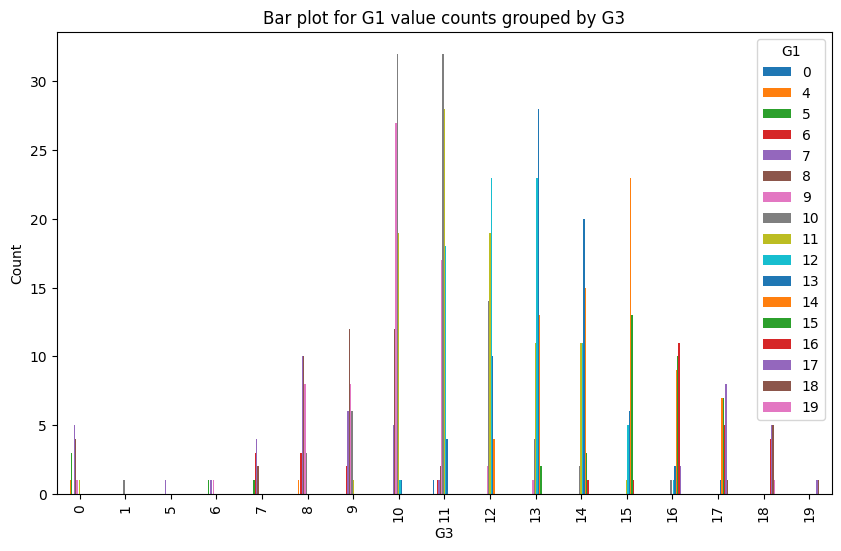

*********************************
+++++++++++++++ G2 +++++++++++++++
G2   0    5    6    7     8     9     10    11    12    13    14    15    16  \
G3                                                                             
0   7.0  1.0  1.0  3.0   2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0  0.0  0.0  0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
5   0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6   0.0  0.0  1.0  1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
7   0.0  1.0  2.0  3.0   4.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
8   0.0  1.0  3.0  8.0  14.0   9.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
9   0.0  0.0  0.0  1.0  11.0  13.0   8.0   1.0   1.0   0.0   0.0   0.0   0.0   
10  0.0  0.0  0.0  0.0   7.0  38.0  37.0  13.0   0.0   2.0   0.0   0.0   0.0   
11  0.0  0.0  0.0  0.0   0.0  10.0  35.0  57.0   2.0   0.0   0.0   0.0   0.0   
12  0.0  0.0  0.0  0.0   0.0   1.0   0.0  28.0  34.

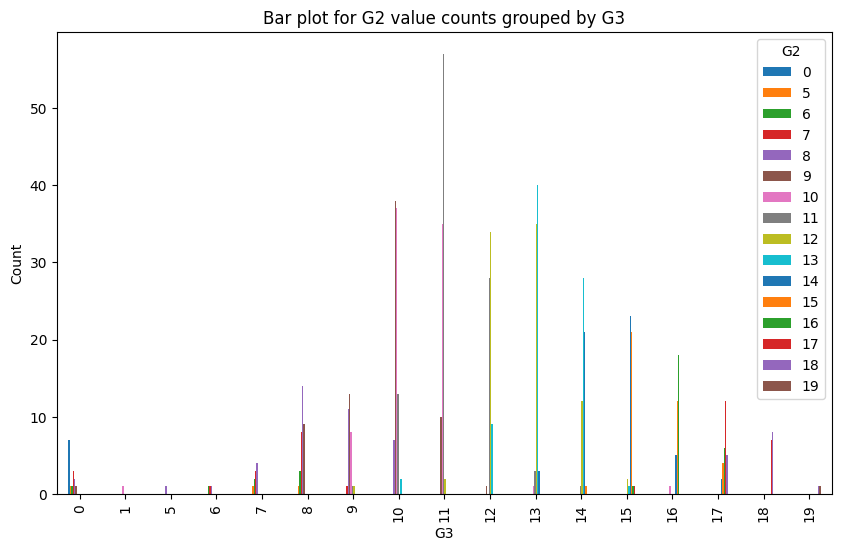

*********************************


In [18]:
# 7.1 Calculate and visualise the value_count of each column grouped by G3 - the target variable in the form of bar chart
for i in df1.columns:
    if i != 'G3':
        result = df1.groupby('G3')[i].value_counts().unstack().fillna(0) # unstack and fill the NaN values with 0
        
        print("+++++++++++++++",i,"+++++++++++++++")
        
        # Display the result
        print(result)
        
        # Plotting the bar chart
        result.plot(kind='bar', figsize=(10, 6))
        plt.title(f'Bar plot for {i} value counts grouped by G3')
        plt.xlabel('G3')
        plt.ylabel('Count')
        plt.show()

        print("*********************************")

In [19]:
# 8. calculate the no of unique values and the list of unique values in each column
for i in df1.columns:
    print("+++++++++++++++",i,"+++++++++++++++")
    print("No of unique values in {} is:- ".format(i),df1[i].nunique()) # unique number 
    print("Unique values in {} is:- ".format(i),df1[i].unique()) # unique values
    

+++++++++++++++ school +++++++++++++++
No of unique values in school is:-  2
Unique values in school is:-  ['GP' 'MS']
+++++++++++++++ sex +++++++++++++++
No of unique values in sex is:-  2
Unique values in sex is:-  ['F' 'M']
+++++++++++++++ age +++++++++++++++
No of unique values in age is:-  8
Unique values in age is:-  [18 17 15 16 19 22 20 21]
+++++++++++++++ address +++++++++++++++
No of unique values in address is:-  2
Unique values in address is:-  ['U' 'R']
+++++++++++++++ famsize +++++++++++++++
No of unique values in famsize is:-  2
Unique values in famsize is:-  ['GT3' 'LE3']
+++++++++++++++ Pstatus +++++++++++++++
No of unique values in Pstatus is:-  2
Unique values in Pstatus is:-  ['A' 'T']
+++++++++++++++ Medu +++++++++++++++
No of unique values in Medu is:-  5
Unique values in Medu is:-  [4 1 3 2 0]
+++++++++++++++ Fedu +++++++++++++++
No of unique values in Fedu is:-  5
Unique values in Fedu is:-  [4 1 2 3 0]
+++++++++++++++ Mjob +++++++++++++++
No of unique values in

In [20]:
df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [21]:
# 9. Perform Label encoding on non numeric columns
from sklearn.preprocessing import LabelEncoder # import the library

label_encoder = LabelEncoder() # create an instance of label encoder

# df1.select_dtypes select all values from the dataset based on the datatype mentioned in the parameter "include"
# The o/p of df1.select_dtypes is also a dataframe.
g = df1.select_dtypes(include=['object']).columns # extracts only the column names whose dtype is object
g

#fit the encoder to the df1 which has non numeric values
for column in g:
    df1[column] = label_encoder.fit_transform(df1[column])

df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,4,15,15,16
646,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,6,10,10,10


<Axes: >

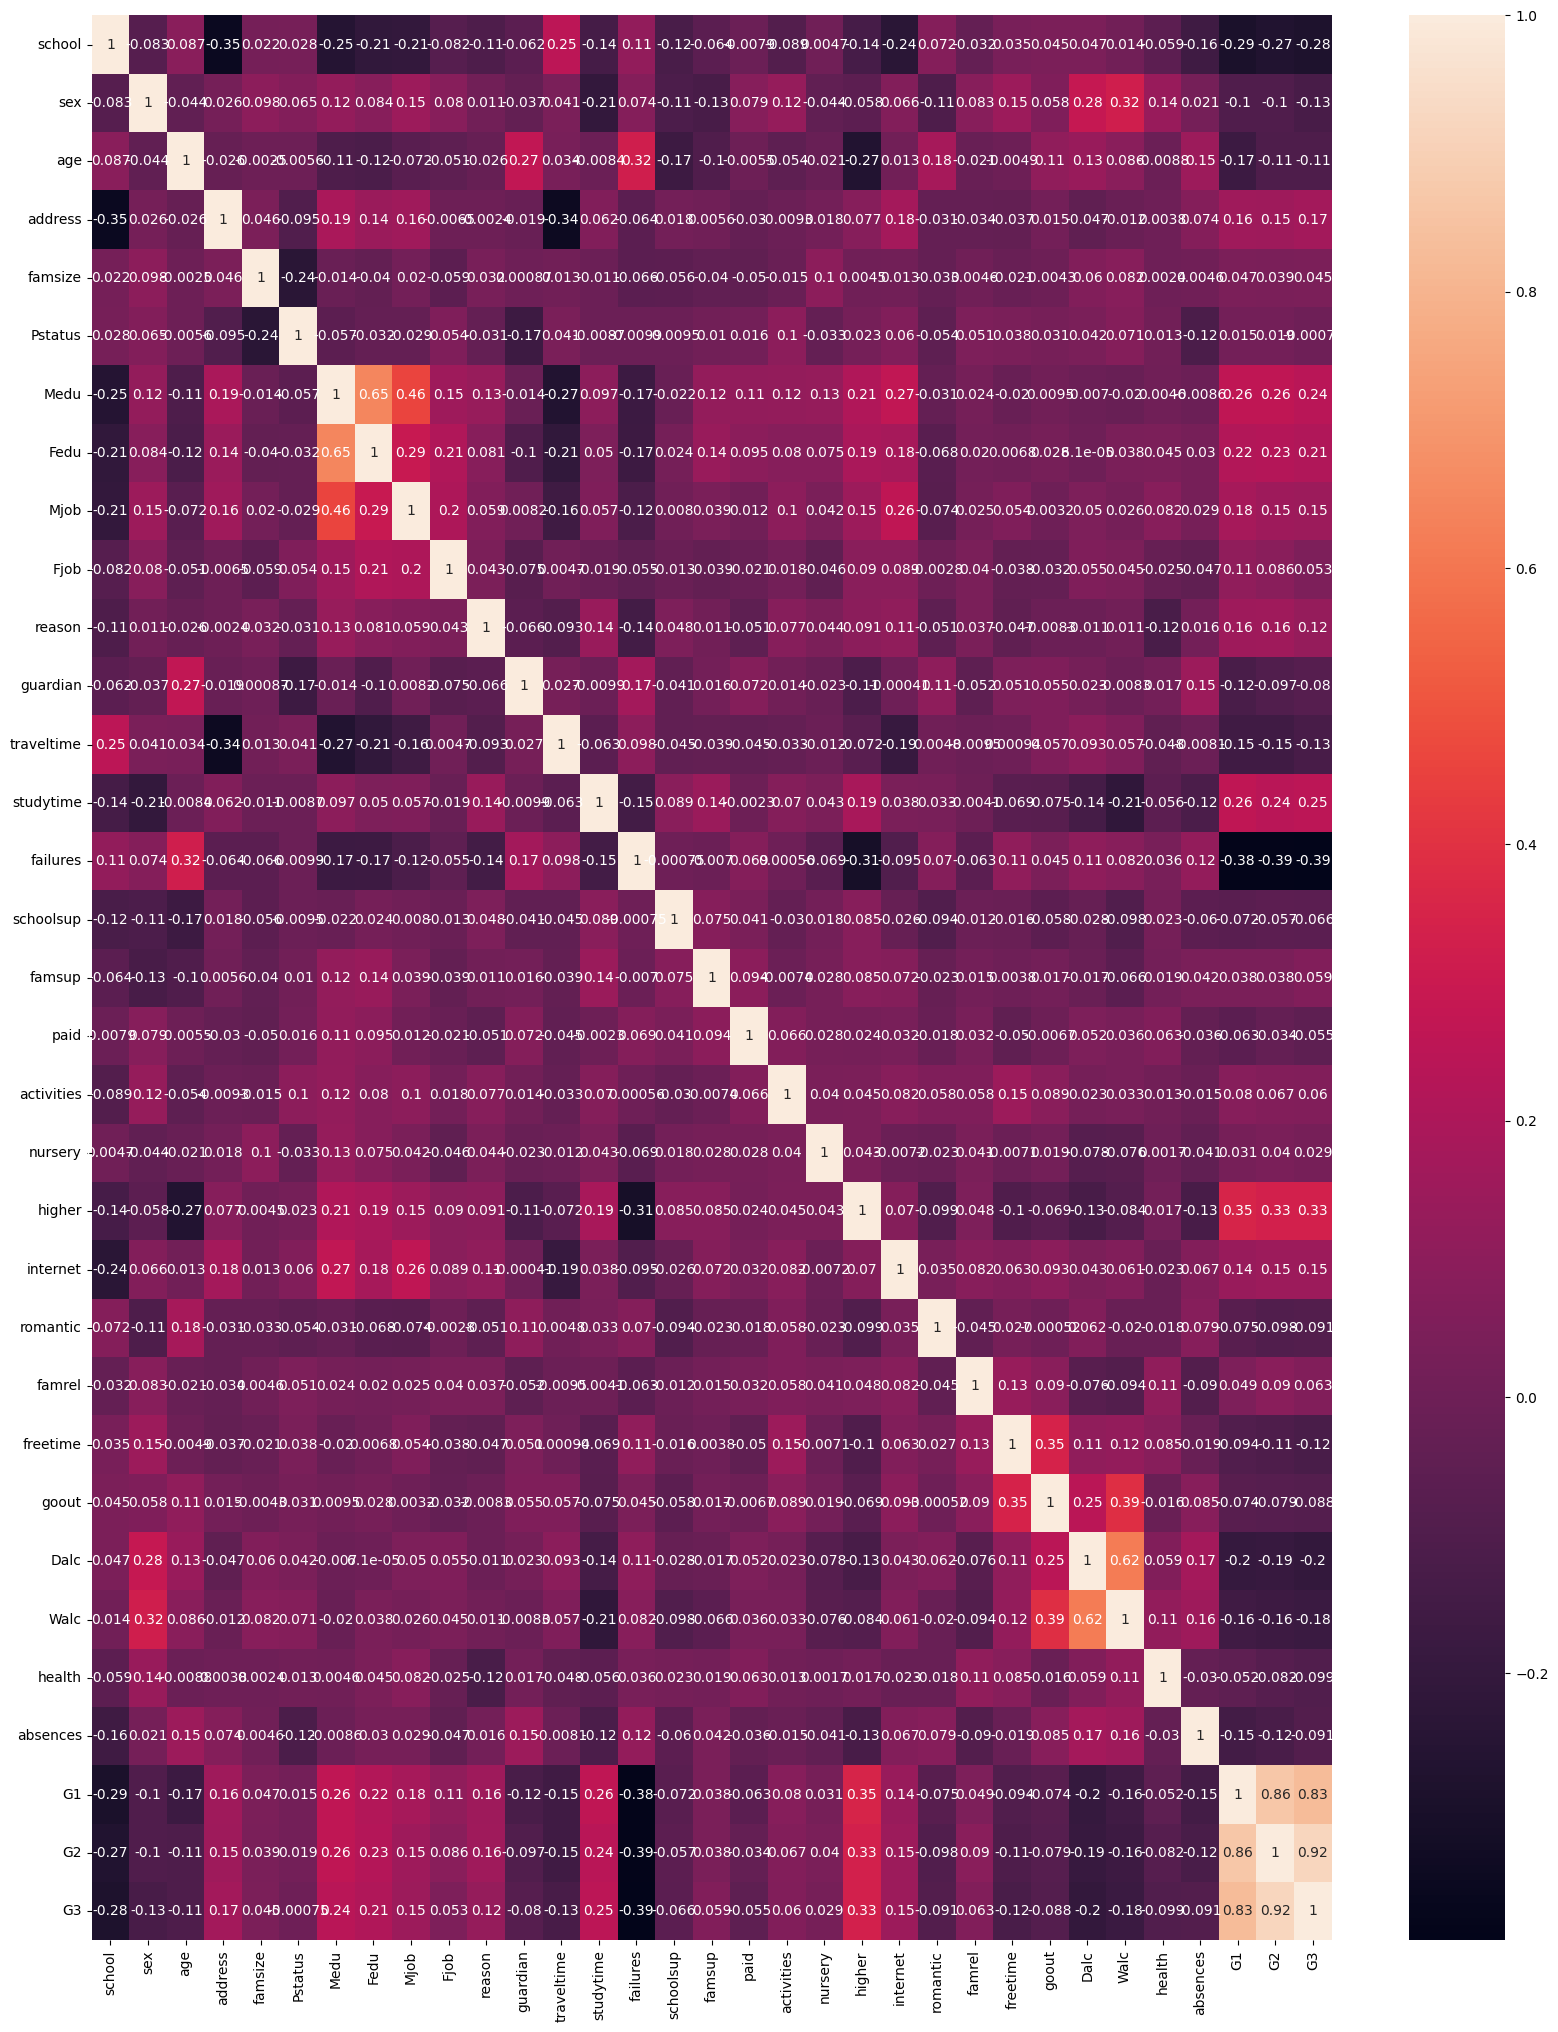

In [22]:
#10. plot the heatmap to visualise the correlation btw each columns/features
plt.figure(figsize=(20,25))
sns.heatmap(df1.corr(),color='k',annot=True)

In [23]:
# 10.1 data correlation using table format
df1.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.083050,0.087170,-0.354520,0.022252,0.028120,-0.254787,-0.209806,-0.206829,-0.081872,...,-0.031597,0.034666,0.044632,0.047169,0.014169,-0.058599,-0.163933,-0.292626,-0.269776,-0.284294
sex,-0.083050,1.000000,-0.043662,0.025503,0.098205,0.064700,0.119127,0.083913,0.149635,0.080466,...,0.083473,0.146305,0.058178,0.282696,0.320785,0.139547,0.021336,-0.104109,-0.104005,-0.129077
age,0.087170,-0.043662,1.000000,-0.025848,-0.002470,-0.005631,-0.107832,-0.121050,-0.071770,-0.050846,...,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
address,-0.354520,0.025503,-0.025848,1.000000,0.046113,-0.094635,0.190320,0.141493,0.159761,-0.006535,...,-0.033897,-0.036647,0.015475,-0.047304,-0.012416,0.003787,0.073653,0.157127,0.154600,0.167637
famsize,0.022252,0.098205,-0.002470,0.046113,1.000000,-0.239608,-0.014325,-0.039538,0.019600,-0.059443,...,0.004641,-0.021257,-0.004312,0.060482,0.081958,0.002448,0.004645,0.047230,0.038891,0.045016
Pstatus,0.028120,0.064700,-0.005631,-0.094635,-0.239608,1.000000,-0.057174,-0.031856,-0.028874,0.054306,...,0.051303,0.037585,0.031086,0.041513,0.070976,0.012638,-0.117492,0.015251,0.018689,-0.000754
Medu,-0.254787,0.119127,-0.107832,0.190320,-0.014325,-0.057174,1.000000,0.647477,0.459337,0.152582,...,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.209806,0.083913,-0.121050,0.141493,-0.039538,-0.031856,0.647477,1.000000,0.290703,0.211604,...,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
Mjob,-0.206829,0.149635,-0.071770,0.159761,0.019600,-0.028874,0.459337,0.290703,1.000000,0.202651,...,0.025049,0.053927,0.003182,0.049576,0.025657,0.081525,0.028519,0.181551,0.153875,0.148252
Fjob,-0.081872,0.080466,-0.050846,-0.006535,-0.059443,0.054306,0.152582,0.211604,0.202651,1.000000,...,0.039500,-0.037952,-0.031913,0.055389,0.044607,-0.025069,-0.047477,0.109847,0.086343,0.052953


In [24]:
# # Assuming 'df' is your DataFrame
# correlation_matrix = df1.corr()

# # Set a correlation threshold
# threshold_max = 0.7
# threshold_min = 0.1

# # Find highly correlated pairs
# highly_correlated_pairs = (correlation_matrix.abs() > threshold_max) & (correlation_matrix < 1)
# least_correlated_pairs = (correlation_matrix.abs() < threshold_min) & (correlation_matrix > 0)

# print("Highly correlated pairs:")
# print(correlation_matrix[highly_correlated_pairs].stack())
# print("************************")

# print("Least correlated pairs:")
# print(correlation_matrix[least_correlated_pairs].stack())

###############################################################################################################

# # Assuming df is your dataframe and target_column is the name of your target column
# # Calculate the correlation matrix
# correlation_matrix = df.corr()

# # Set the threshold for correlation
# threshold = 0.1

# # Extract columns with correlation less than the threshold (ignoring the sign)
# least_correlated_columns = correlation_matrix[(correlation_matrix.abs() < threshold) & (correlation_matrix.abs() > 0)].index

# # Print or use the least correlated columns
# print("Columns with correlation less than 0.1 to the target column:")
# print(least_correlated_columns)


In [25]:
# # Assuming 'df' is your DataFrame
# correlation_matrix = df1.corr()

# # Set a correlation threshold for highly correlated columns with respect to the target variable
# target_correlation_threshold = 0.7
# least_correlation_threshold = 0.1

# # Assuming 'target_variable' is the name of your target variable column
# target_correlations = correlation_matrix['G3']

# # Find highly correlated columns with respect to the target variable
# highly_correlated_columns = target_correlations[abs(target_correlations) > target_correlation_threshold].index.tolist()

# # Find least correlated columns with respect to the target variable
# least_correlated_columns = target_correlations[abs(target_correlations) < least_correlation_threshold].index.tolist()

# print("Highly correlated columns with respect to the target variable:")
# print(highly_correlated_columns)
# print("************************")

# print("Least correlated columns with respect to the target variable:")
# print(least_correlated_columns)

######################################################################################################

# 10.2 finding out the least, leastest and mostly correlated features with respect to the target variable (G3)
correlation_matrix = df1.corr()

# Set a correlation threshold for highly correlated columns with respect to the target variable
target_correlation_threshold = 0.7
# Set a correlation threshold for least correlated columns with respect to the target variable
least_correlation_threshold = 0.1
# Set a correlation threshold for leastest correlated columns with respect to the target variable
max_least_correlation_threshold = .05

# Assuming 'G3' is the name of your target variable column
target_correlations = correlation_matrix['G3']

# Find highly correlated columns with respect to the target variable
highly_correlated_columns = target_correlations[abs(target_correlations) > target_correlation_threshold]

# Find least correlated columns with respect to the target variable
least_correlated_columns = target_correlations[abs(target_correlations) < least_correlation_threshold]

# Find max least correlated columns with respect to the target variable
max_least_correlated_columns = target_correlations[abs(target_correlations) < max_least_correlation_threshold]


print("Highly correlated columns with respect to the target variable:")
for column in highly_correlated_columns.index:
    correlation_value = target_correlations[column]
    print(f"{column}: {correlation_value}")

print("************************")

print("Least correlated columns with respect to the target variable:")
for column in least_correlated_columns.index:
    correlation_value = target_correlations[column]
    print(f"{column}: {correlation_value}")
    

print("************************")

print("Leastest correlated columns with respect to the target variable:")
for column in max_least_correlated_columns.index:
    correlation_value = target_correlations[column]
    print(f"{column}: {correlation_value}")



Highly correlated columns with respect to the target variable:
G1: 0.8263871247890486
G2: 0.9185480035603523
G3: 1.0
************************
Least correlated columns with respect to the target variable:
famsize: 0.04501636801724957
Pstatus: -0.0007539250498185333
Fjob: 0.052953289283809456
guardian: -0.07960893515506398
schoolsup: -0.06640474759529709
famsup: 0.05920555554578795
paid: -0.054897907823289446
activities: 0.05979145042708646
nursery: 0.02875235931905971
romantic: -0.09058288359599934
famrel: 0.06336112772983052
goout: -0.08764072272424255
health: -0.09885124139431797
absences: -0.09137905643875596
************************
Leastest correlated columns with respect to the target variable:
famsize: 0.04501636801724957
Pstatus: -0.0007539250498185333
nursery: 0.02875235931905971


In [26]:
# we can remove the leastest/ perhaps the least correlated coumns in the dataset 

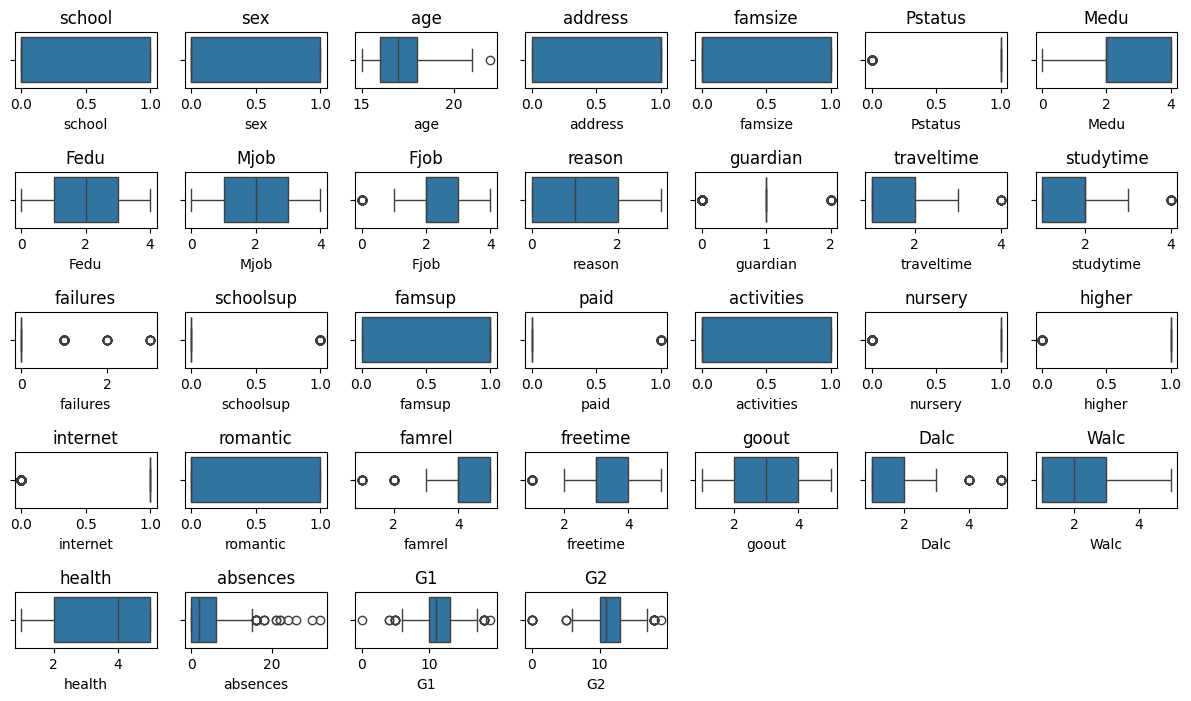

In [27]:
# 11. Outlier Treatment

# 11.1 Visualize the outliers using boxplot before outlier treatment

# Assuming your target variable is named 'target_column'
target_column = 'G3'

# Get the list of columns excluding the target variable
columns_to_plot = [col for col in df1.columns if col != target_column]

# Set up the size of the plot based on the number of columns
plt.figure(figsize=(15, 8))

# Loop through each column and create a boxplot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(5, 7, i)  # Adjust the subplot dimensions as per your preference
    sns.boxplot(x = df1[column])
    plt.title(column)

# Adjust the spacing between subplots to add a newline after each row
plt.subplots_adjust(hspace=1.5)

plt.show()

# target_variable = 'G3'

# # Select columns excluding the target variable
# columns_to_check = df1.columns[df1.columns != target_variable]

# # Function to detect outliers using IQR method
# def detect_outliers(data):
#     Q1 = data.quantile(0.25)
#     Q3 = data.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = (data < lower_bound) | (data > upper_bound)
#     return outliers

# # Iterate through columns and print outliers
# for column in columns_to_check:
#     outliers = detect_outliers(df1[column])
#     print(f"Outliers in column '{column}': {df1[column][outliers]}")

In [28]:
# 11.2 Outlier Treatment

# The Outlier is treated by capping the outliers with the lower bound and upper bound
target_variable = 'G3'

# Select columns excluding the target variable
columns_to_check = df1.columns[df1.columns != target_variable]

# Function to replace outliers with lower and upper bounds
def replace_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
 
    # Cap outliers between lower and upper bounds
    data = data.clip(lower_bound, upper_bound) # Data.clip trims values at input threshold(s).Assigns values outside boundary to boundary values.
    return data

# Iterate through columns and replace outliers
for column in columns_to_check:
    df1[column] = replace_outliers(df1[column])

# Now, df1 contains the DataFrame with outliers replaced by the lower and upper bounds

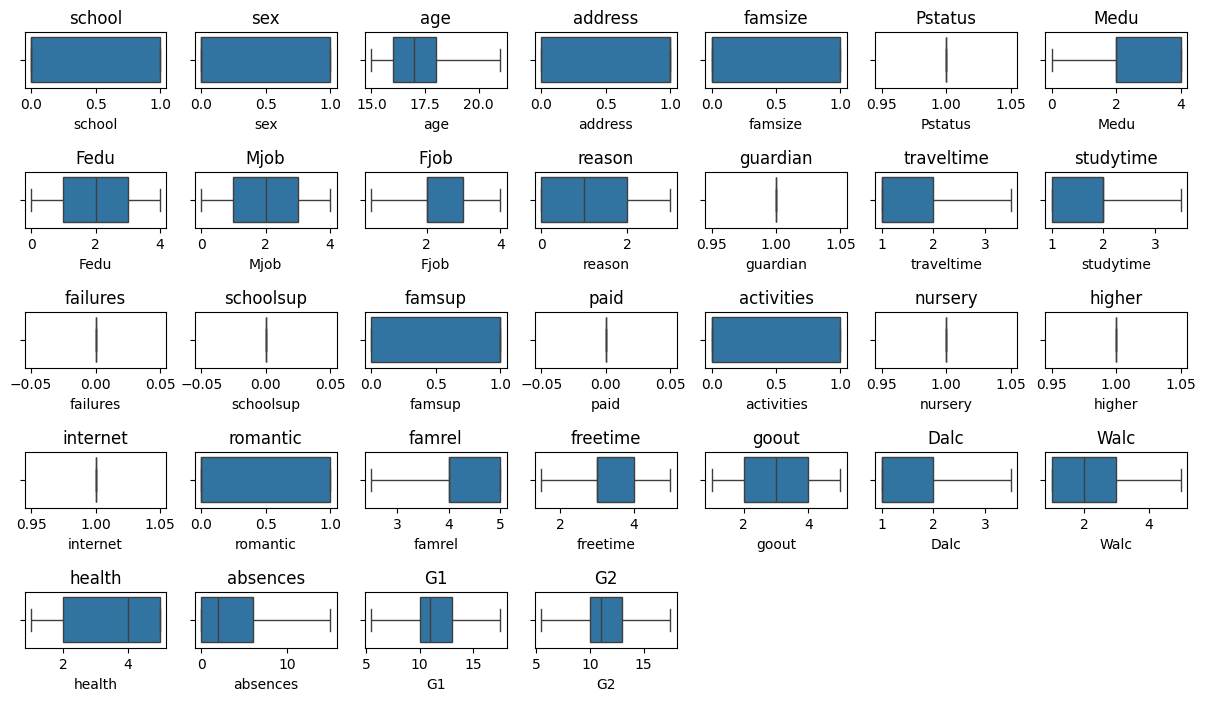

In [29]:

# 11.3 Visualize the outliers using boxplot After outlier treatment

# Assuming your target variable is named 'target_column'
target_column = 'G3'

# Get the list of columns excluding the target variable
columns_to_plot = [col for col in df1.columns if col != target_column]

# Set up the size of the plot based on the number of columns
plt.figure(figsize=(15, 8))

# Loop through each column and create a boxplot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(5, 7, i)  # Adjust the subplot dimensions as per your preference
    sns.boxplot(x = df1[column])
    plt.title(column)
    
# Adjust the spacing between subplots to add a newline after each row
plt.subplots_adjust(hspace=1.5)

plt.show()

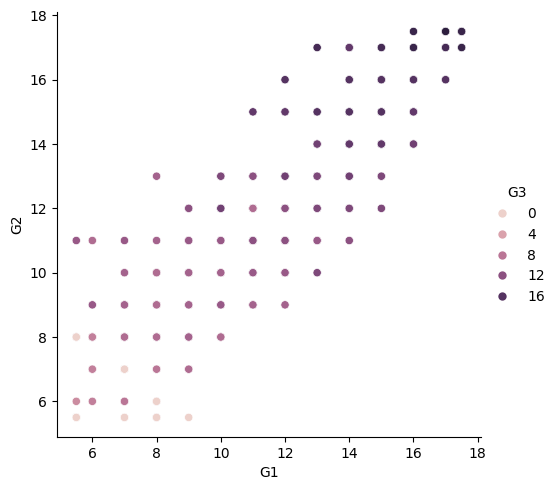

In [30]:
# 12. plot relplot to visualise how variables within a dataset are related to each other.
sns.relplot(data=df1, x="G1", y="G2", hue="G3")

<Axes: xlabel='G1', ylabel='Proportion'>

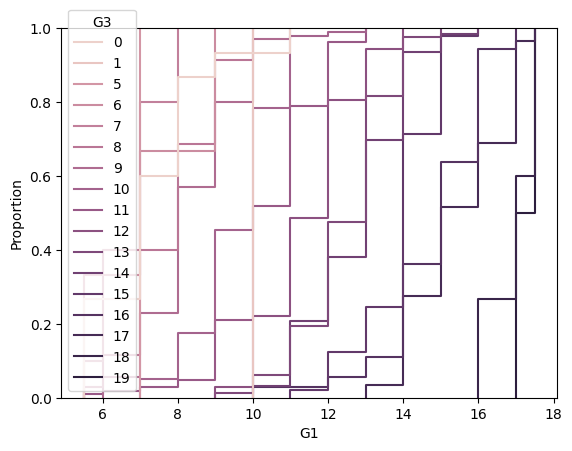

In [31]:
# 13. plot ecdf plot to represents the proportion or count of observations falling below each unique value in a dataset
sns.ecdfplot(data=df1, x="G1", hue="G3")

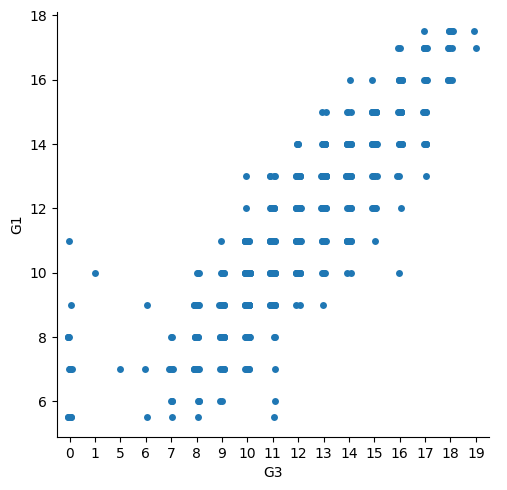

In [32]:
# 14. plot catplot to plot categorical plots and thereby illustrate the connection between numerical data and one or more category variables.
sns.catplot(data=df1, x="G3", y="G1")

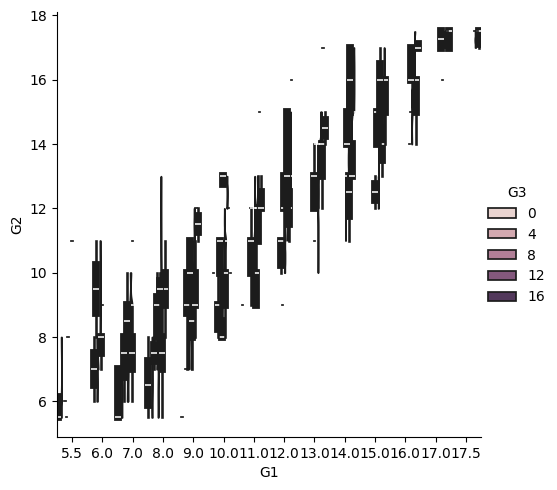

In [33]:
# 14. plot violin plot from catplot to shows the distribution of data points after grouping by one (or more) variables.
sns.catplot(
    data=df1, x="G1", y="G2", hue="G3",
    kind="violin", bw_adjust=.5, cut=0, split=True,
)

<Axes: xlabel='G1', ylabel='G2'>

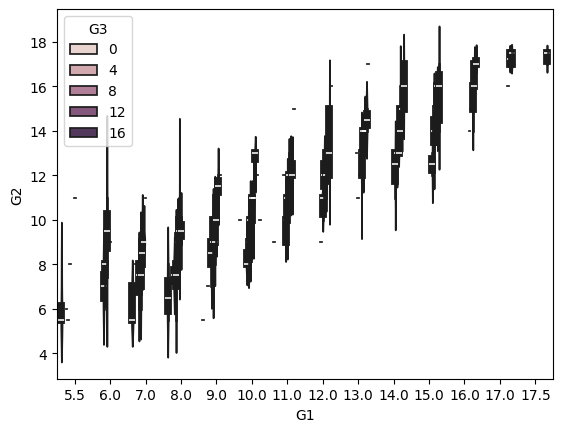

In [34]:
# 14.1 plot violin plot to shows the distribution of data points after grouping by one (or more) variables.
sns.violinplot(data=df1, x="G1", y="G2", hue="G3")

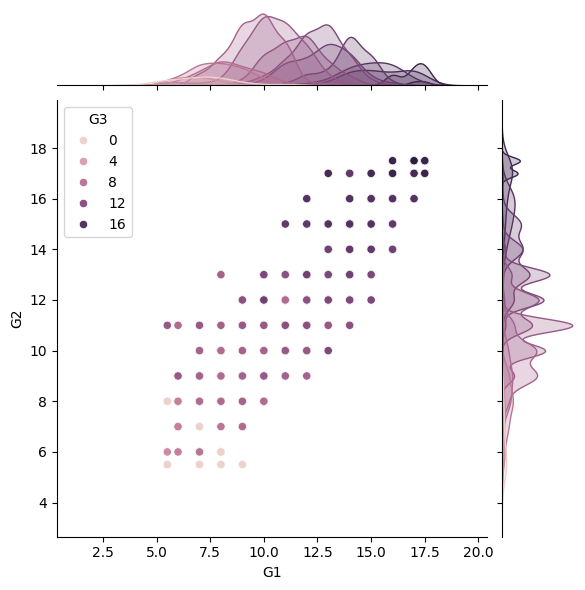

In [35]:
# 15. plot jointplot to subplot grid for plotting pairwise relationships in a dataset. 
sns.jointplot(data=df1, x="G1", y="G2", hue="G3")